In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import time
import scipy.io as sio
from random import shuffle
import time
from collections import Counter
import sklearn.cluster as cluster
import time
import hdbscan
from os import listdir
from os.path import isfile, join
import os
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from pathlib import Path

#import plotly. as py
#import plotly.graph_objs as go
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2)

# dereks function for optimal leaf clustering
def _optimal_order(data, **kwargs):
    """ Optimal leaf ordering
        **kwargs passed to pdist e.g. metric='correlation'
    """
    d = pdist(data, **kwargs)
    link = linkage(d, method='average')
    optimal_order = optimal_leaf_ordering(link, d)
    return optimal_order

from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from polo import optimal_leaf_ordering

In [2]:
# load metadata for all 111 Obsidian MAGs
lookup_obsidian = pd.read_table('Tree_Obsidian/FredV2/ObsV2/metadata/ObsidianPool_UNI56_allbins_mafftBMGE_nofilteringnoclustering - Sheet1.tsv')
# add CRISPR column
lookup_obsidian.set_index('Obsidian Bins ',inplace=True)
lookup_obsidian['CRISPR'] = ''
for name in lookup_obsidian.index:
    num = lookup_obsidian.loc[name,'IMG_ID'].astype(str)
    path = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'+name+'_IMG_'+num+'/IMG_Data/'+num+'/'+num+'.crispr.txt'
    file = Path(path)
    if file.is_file():
        lookup_obsidian.loc[name,'CRISPR'] = 'Yes'
    else:
        lookup_obsidian.loc[name,'CRISPR'] = 'No'

In [86]:
mypath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'
keys = list(lookup_obsidian[lookup_obsidian['CRISPR']=='Yes'].index)

for binn in lookup_obsidian[lookup_obsidian['CRISPR']=='Yes'].index:
    IMG_ID = lookup_obsidian.loc[binn,'IMG_ID'].astype(str)
    file  = mypath+binn+'_IMG_'+IMG_ID+'/IMG_Data/'+IMG_ID+'/'+IMG_ID+'.crispr.txt'
    names = ['contig', 'start', 'end','repeat','spacer','c']
    
    if binn == 'Obs2_genome_000':
        values = [str(list(crisprdf.contig.unique()))]
        crisprdf = pd.read_table(file,sep='\t',header=None,names=names)
        crisprdf['bin']=binn
    else:
        values = values+[str(list(crisprdf.contig.unique()))]
        crisprdftemp = pd.read_table(file,sep='\t',header=None,names=names)
        crisprdftemp['bin']=binn
        
        crisprdf = crisprdf.append(crisprdftemp,ignore_index=True)

#crispdict = dict(zip(keys,values))
singles = pd.DataFrame(index=range(15),columns=crisprdf.bin.unique())
for col in singles.columns:
    doubles = crisprdf[crisprdf['bin'].str.contains(col)].groupby('spacer')['contig'].sum().unique()
    singlelist = doubles
    for i in range(0,len(doubles)):
        if len(doubles[i])<18:
            singlelist[i] = doubles[i]
        elif len(doubles[i])<30:
            singlelist[i] = doubles[i][0:int(len(doubles[i])/2)]
        elif len(doubles[i])<45:
            singlelist[i] = doubles[i][0:int(len(doubles[i])/3)]
        elif len(doubles[i])>45:
            singlelist[i] = doubles[i][0:int(len(doubles[i])/4)]
    #print(singlelist)
    singles.loc[0:len(singlelist)-1,col] = singlelist



,Obs2_genome_000,Obs2_genome_003,Obs2_genome_004,Obs2_genome_006,Obs2_genome_007,Obs2_genome_008,Obs2_genome_009,Obs2_genome_010,Obs2_genome_011,Obs2_genome_013,...,Obs5_genome_080,Obs5_genome_082,Obs5_genome_083,Obs5_genome_089,Obs5_genome_092,Obs5_genome_093,Obs6_genome_099,Obs6_genome_100,Obs6_genome_102,Obs6_genome_108
0,Ga0254896_132,Ga0254899_1035,Ga0254900_140,Ga0254902_1132,Ga0254903_121,Ga0254904_1012,Ga0254905_145,Ga0254906_1038,Ga0254907_1043,Ga0254909_1036,...,Ga0254976_1644,Ga0254978_1634,Ga0254979_1078,Ga0254985_106,Ga0254988_1049,Ga0254989_160,Ga0254995_1093,Ga0254996_1069,Ga0254998_1032,Ga0255004_1185
1,Ga0254896_144,Ga0254899_1073,Ga0254900_102,NaN,Ga0254903_118,NaN,NaN,Ga0254906_1076,NaN,NaN,...,Ga0254976_1252,Ga0254978_1529,NaN,Ga0254985_145,Ga0254988_1071,Ga0254989_160,NaN,NaN,Ga0254998_1050,Ga0255004_1159
2,Ga0254896_124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ga0254976_1546,Ga0254978_1193,NaN,Ga0254985_137,Ga0254988_1071,Ga0254989_115,NaN,NaN,Ga0254998_1100,NaN
3,Ga0254896_161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ga0254976_1010,Ga0254978_1643,NaN,NaN,NaN,Ga0254989_160,NaN,NaN,Ga0254998_1032,NaN
4,Ga0254896_163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ga0254976_1644,Ga0254978_1312,NaN,NaN,NaN,NaN,NaN,NaN,Ga0254998_1071,NaN
5,Ga0254896_150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ga0254976_1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ga0254896_135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ga0254896_116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
crisprdf.contig.unique()
crisprdf
lookup_obsidian[lookup_obsidian['CRISPR']=='Yes']


[str(list(crisprdf.contig.unique()))]
crispdict['Obs2_genome_000']
crisprdf[crisprdf['bin'].str.contains('080')].groupby('spacer')['contig'].sum().unique()
crisprdf

,contig,start,end,repeat,spacer,c,bin
0,Ga0254896_150,1,26828,GTTCCTAATGTACCGTGTGGAGTTGAAAG,ACCTGCTTTATGAGGTTGATAGCGTAAGCATCAATGT,c,Obs2_genome_000
1,Ga0254896_150,1,26894,GTTCCTAATGTACCGTGTGGAGTTGAAAG,GCGACATTGAAACTGCTTATGGAGTGTAGGTATAAC,c,Obs2_genome_000
2,Ga0254896_150,1,26959,GTTCCTAATGTACCGTGTGGAGT,NaN,c,Obs2_genome_000
3,Ga0254896_161,1,7499,AACAATGATTTATATCATATTATTAGGAAC,TAAGAACAGATTATATCTCACTTTATAAGTGATAAC,c,Obs2_genome_000
4,Ga0254896_161,1,7565,ACTTTCAACTCCACACGGTACATTAGGAAC,GTCGCATTCCTGCCTCCAGTGTTTACCACTCTATCT,c,Obs2_genome_000
5,Ga0254896_161,1,7631,ACTTTCAACTCCACACGGTACATTAGGAAC,TCATTATCTCCATAGTTTCTTTACCTCATTTAAAGC,c,Obs2_genome_000
6,Ga0254896_161,1,7697,ACTTTCAACTCCACACGGTACATTAGGAAC,AACAAAGGAAAAAGTGAAGTCAGCGGATACTACG,c,Obs2_genome_000
7,Ga0254896_161,1,7761,ACTTTCAACTCCACACGGTACATTAGGAAC,ACAATATTTCTTTGTTTATGTATGGGATAAGAACGAG,c,Obs2_genome_000
8,Ga0254896_161,1,7828,CCTTTCAAC,NaN,c,Obs2_genome_000
9,Ga0254896_124,1,1,CCTAATGTACCGTGTGGAGTTGAAAG,TCTCTAAGAAAGTTTTTGAACTTCTGCAATATCTCTGT,c,Obs2_genome_000


In [16]:
# get the MAG foldernames and associated KO-numbers
mypath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'
foldernames = [f for f in listdir(mypath) if ('Knumbers') not in f and ('NN_MAGs') not in f]
foldernames
for name in 
"""
#rename folders (one-time thing after downloading IMG data)
for f in listdir(mypath):
    gen = lookup_obsidian[lookup_obsidian['IMG_ID'].astype(str)==f[4:]]['Obsidian Bins '].values[0]
    newname = gen+'_'+f
    os.rename(os.path.join(mypath,f),os.path.join(mypath,newname))
"""
"""#rename folders (one-time thing after downloading IMG data)
for f in listdir(mypath):
    base = mypath+f+'/'
    for j in listdir(base):
        os.rename(os.path.join(base,j),os.path.join(base,'IMG_Data'))
    """

"""import zipfile
path_to_zip_file ='/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Obs2_genome_011_IMG_2770939340/IMG Data/'       
zip_ref = zipfile.ZipFile(path_to_zip_file, 'r')
#zipfile.ZipFile.extractall(zippath)

#unzip subfolder 
for f in listdir(mypath):
    zippath ='/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Obs2_genome_011_IMG_2770939340/IMG Data'
     
    
zip_ref = zipfile.ZipFile(path_to_zip_file, 'r')
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()"""

"import zipfile\npath_to_zip_file ='/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Obs2_genome_011_IMG_2770939340/IMG Data/'       \nzip_ref = zipfile.ZipFile(path_to_zip_file, 'r')\n#zipfile.ZipFile.extractall(zippath)\n\n#unzip subfolder \nfor f in listdir(mypath):\n    zippath ='/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Obs2_genome_011_IMG_2770939340/IMG Data'\n     \n    \nzip_ref = zipfile.ZipFile(path_to_zip_file, 'r')\nzip_ref.extractall(directory_to_extract_to)\nzip_ref.close()"

In [4]:
from urllib.request import Request, urlopen, URLError
from urllib.parse import urlencode
from lxml import etree
import lxml
import html2text as h2t
from html.parser import HTMLParser

class myhtmlparser(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()

        self.NEWTAGS = []
        self.NEWATTRS = []
        self.HTMLDATA = []
    def handle_starttag(self, tag, attrs):
        self.NEWTAGS.append(tag)
        self.NEWATTRS.append(attrs)
    def handle_data(self, data):
        self.HTMLDATA.append(data)
    def clean(self):
        self.NEWTAGS = []
        self.NEWATTRS = []
        self.HTMLDATA = []

# get the MAG foldernames, associated KO-numbers and COG hits

In [3]:
mypath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'
foldernames = [f for f in listdir(mypath) if ('Knumbers') not in f and ('NN_MAGs') not in f]

foldername = pd.DataFrame(index=range(len(foldernames)),columns=['folder_name','number','genome'])
foldername['folder_name'] = [f for f in foldernames]
foldername['number'] = [f[-10:] for f in foldernames]
foldername['genome'] = [f[0:15] for f in foldernames]
ktab = pd.DataFrame(index=range(10000),columns=list(foldername['genome']))
ctab = pd.DataFrame(index=range(10000),columns=list(foldername['genome']))
ctab_thr = pd.DataFrame(index=range(10000),columns=list(foldername['genome'])) # threshold hit value

# make KO-list table and write to txt file in Knumbers folder
for i in range(0,len(foldername)):
    kofile = mypath+foldername.loc[i,'folder_name']+'/IMG_Data/'+foldername.loc[i,'number']+'/'+foldername.loc[i,'number']+'.ko.tab.txt'        
    ktab[foldername.loc[i,'genome']] = pd.read_csv(kofile,'\t')['ko_id'].str[3:]
    ktab[foldername.loc[i,'genome']].to_csv(mypath+'Knumbers/'+foldername.loc[i,'genome']+'.txt',sep='\t')
# make COG-list table 
for i in range(0,len(foldername)):
    cofile = mypath+foldername.loc[i,'folder_name']+'/IMG_Data/'+foldername.loc[i,'number']+'/'+foldername.loc[i,'number']+'.cog.tab.txt'        
    ctab[foldername.loc[i,'genome']] = pd.read_csv(cofile,'\t')['cog_id']
    ctab_thr[foldername.loc[i,'genome']] = pd.read_csv(cofile,'\t')['percent_identity']
    #ctab[foldername.loc[i,'genome']].to_csv(mypath+'Knumbers/'+foldername.loc[i,'genome']+'.txt',sep='\t')
    
# COG dfs with different percent identity threshold values 
ctab_30 = ctab[ctab_thr>30]
ctab_40 = ctab[ctab_thr>40]
ctab_50 = ctab[ctab_thr>50]
ctab_60 = ctab[ctab_thr>60]
ctab_70 = ctab[ctab_thr>70]
ctab_80 = ctab[ctab_thr>80]

In [4]:
df = pd.read_csv(cofile,'\t')[['cog_id','percent_identity']]
df[df['percent_identity']>70]


,cog_id,percent_identity
171,COG1156,70.93
250,COG2053,70.59
987,COG1156,70.93
1066,COG2053,70.59


In [ ]:
cmap_30 = COGmapper(ctab_30)

# Clade MAGs

In [6]:
cladeDF = pd.read_table('MAGs/extractclades/ObsidianPool_selected_groups.tsv')
cladeDF_tot = pd.read_table('MAGs/extractclades/ObsidianPool_allclades.tsv')
# make one ktab for all clades, including my own Obsidian Pool genomes
ktab_clade = pd.DataFrame(index=range(10000),columns=list(cladeDF['Bin_ID']))
ctab_clade = pd.DataFrame(index=range(10000),columns=list(cladeDF['Bin_ID']))
ctab_clade_thr = pd.DataFrame(index=range(10000),columns=list(cladeDF['Bin_ID']))

for bins in ktab_clade.columns:
    if bins[0:3]=='Obs':
        # this assumes the ktab and ctab dfs have been made 
        ktab_clade[bins] = ktab[bins]
        ctab_clade[bins] = ctab[bins]
        ctab_clade_thr[bins] = ctab_thr[bins]
    elif bins[0:3]=='UBA':
        ktab_clade.drop(bins,axis=1,inplace=True)
        ctab_clade.drop(bins,axis=1,inplace=True)
        ctab_clade_thr.drop(bins,axis=1,inplace=True)
    else:
        # go to extractclade 
        path = 'MAGs/extractclades/'
        subfolder = cladeDF[cladeDF['Bin_ID']==bins]['Group'].values[0]
        kofile = path+subfolder+'/'+bins+'/'+bins+'.ko.tab.txt'
        cofile = path+subfolder+'/'+bins+'/'+bins+'.cog.tab.txt'
        ktab_clade[bins] = pd.read_csv(kofile,'\t')['ko_id'].str[3:]
        ktab_clade[bins].to_csv(path+'Knumbers/'+bins+'.txt',sep='\t')
        ctab_clade[bins] = pd.read_csv(cofile,'\t')['cog_id']
        ctab_clade_thr[bins] = pd.read_csv(cofile,'\t')['percent_identity']

# COG dfs with different percent identity threshold values 
ctab_clade_30 = ctab_clade[ctab_clade_thr>30]
ctab_clade_40 = ctab_clade[ctab_clade_thr>40]
ctab_clade_50 = ctab_clade[ctab_clade_thr>50]
ctab_clade_60 = ctab_clade[ctab_clade_thr>60]
ctab_clade_70 = ctab_clade[ctab_clade_thr>70]
ctab_clade_80 = ctab_clade[ctab_clade_thr>80]

"""
# copy txt files of Obs to the extractclade Knumbers folder 
from shutil import copyfile
oldpath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Knumbers/'
newpath = 'MAGs/extractclades/Knumbers/'
for MAGs in ktab_clade.columns[ktab_clade.columns.str.contains('Obs')]:
    oldfile = oldpath+MAGs+'.txt'
    newfile = newpath+MAGs+'.txt'
    copyfile(oldfile,newfile)"""

"\n# copy txt files of Obs to the extractclade Knumbers folder \nfrom shutil import copyfile\noldpath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Knumbers/'\nnewpath = 'MAGs/extractclades/Knumbers/'\nfor MAGs in ktab_clade.columns[ktab_clade.columns.str.contains('Obs')]:\n    oldfile = oldpath+MAGs+'.txt'\n    newfile = newpath+MAGs+'.txt'\n    copyfile(oldfile,newfile)"

In [13]:
cladeDF_tot = pd.read_table('MAGs/extractclades/ObsidianPool_allclades.tsv')
clu = cladeDF_tot[cladeDF_tot.Bin_ID.str.contains('Obs')].set_index('Bin_ID')
for binn in lookup_obsidian.index:
    if binn in clu.index:
        lookup_obsidian.loc[binn,'Clade'] = clu.loc[binn,'Clade_name']
    else:
        lookup_obsidian.loc[binn,'Clade'] = 'other'

In [15]:
#lookup_obsidian

In [38]:
#cladeDF[cladeDF['Bin_ID'].str.contains('Obs')]
#pd.read_table('MAGs/extractclades/ObsidianPool_allclades.tsv')

# NN MAGs
## get the MAG foldernames and associated KO-numbers and COG hits for the NN_MAGs

In [12]:
mypath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/'
foldernames = [f for f in listdir(mypath) if ('Knumbers') not in f]
# 
ktab_NN = pd.DataFrame(index=range(10000),columns=foldernames)
ctab_NN = pd.DataFrame(index=range(10000),columns=foldernames)
ctab_NN_thr = pd.DataFrame(index=range(10000),columns=foldernames) # threshold hit value
# make KO-list table and write to txt file in Knumbers folder
# make COG-list table 
for i in range(0,len(foldernames)):
    # KEGG
    kofile = mypath+foldernames[i]+'/'+foldernames[i][4:14]+'/'+foldernames[i][4:14]+'.ko.tab.txt'
    file = Path(kofile)
    if file.is_file():
        ktab_NN[foldernames[i]] = pd.read_csv(kofile,'\t')['ko_id'].str[3:]
        ktab_NN[foldernames[i]].to_csv(mypath+'Knumbers/'+foldernames[i]+'.txt',sep='\t')
    # COG
    cofile = mypath+foldernames[i]+'/'+foldernames[i][4:14]+'/'+foldernames[i][4:14]+'.cog.tab.txt'
    file = Path(cofile)
    if file.is_file():
        ctab_NN[foldernames[i]] = pd.read_csv(cofile,'\t')['cog_id']
        ctab_NN_thr[foldernames[i]] = pd.read_csv(cofile,'\t')['percent_identity']
        #ktab_NN[foldernames[i]].to_csv(mypath+'Knumbers/'+foldernames[i]+'.txt',sep='\t')
        
# COG NNdfs with different percent identity threshold values 
ctab_NN_30 = ctab_NN[ctab_NN_thr>30]
ctab_NN_40 = ctab_NN[ctab_NN_thr>40]
ctab_NN_50 = ctab_NN[ctab_NN_thr>50]
ctab_NN_60 = ctab_NN[ctab_NN_thr>60]
ctab_NN_70 = ctab_NN[ctab_NN_thr>70]
ctab_NN_80 = ctab_NN[ctab_NN_thr>80]

# KEGG mapper:
# Retrieve KEGG modules from KEGG database

In [13]:
def retrieveKEGGmodules(df,typedata,main_dir):
    #typedata can be: 'all','complete', or 'conservative'
    if typedata == 'conservative':
        mode = 'complete+ng1'
    else:
        mode = typedata
        
    # make dataframe
    Mlist = pd.DataFrame(columns=df.columns)
    # make a datafame containing the KEGG entries for known hits. This is incomplete!
    # as I have hits not showing up in the known genomes. 
    # edit Oct 2017: just make a range of len(max(Modules in KEGG database))
    dta = list(range(0,845))
    dta2 = ['M0000'+str(dta[s]) for s in range(0,
                        10)]+['M000'+str(dta[s]) for s in range(10,
                            100)]+['M00'+str(dta[s]) for s in range(100,len(dta))]
    #Mmap = pd.DataFrame(index=known_genomes.index,columns=Klist.columns)
    Mmap = pd.DataFrame(index=dta2,columns=df.columns)
    
    
    a=0
    start_time = time.time()   
    for s in df.columns:
        
        #get list of KEGG genes for a given cluster (tab-delimited text)
        with open(main_dir+'Knumbers/'+s+'.txt', 'rt') as f:
            dat = f.read()

        # retrieve data from KEGG database
        url = 'http://www.genome.jp/kegg-bin/find_module_object'
        params = urlencode({'unclassified': dat, 'mode': mode}).encode()
        html = urlopen(url, params).read()


        # save as html file for reference purposes (and look at detailed output)
        with open(main_dir+'Knumbers/html/'+s+'_'+typedata+'.html', 'wb') as f:
            f.write(html)

        # convert data to list
        pstring = html.decode('utf8') 
        parser = myhtmlparser()
        parser.feed(pstring)

        # Extract data from parser
        tags  = parser.NEWTAGS
        attrs = parser.NEWATTRS
        data  = parser.HTMLDATA

        # Clean the parser
        parser.clean()

        # extract Module numbers and feed to dataframe
        indices = [i for i, s in enumerate(data) if 'M00' in s]
        mdata = [data[s] for s in indices]
        mdatadf = pd.DataFrame(mdata,columns=[s])
        
        if a==0:
            Mlist = mdatadf.copy()
            a=1
        else:
            Mlist = Mlist.join(mdatadf,how='outer')
        Mmap.loc[mdatadf.set_index(s).index,s] = 1
    
    end_time = time.time()            
    print('Retrieving modules from KEGG database took {:.2f} s'.format(end_time - start_time)) 
    Mlist.to_pickle(main_dir+'Knumbers/module_list_'+typedata)
    Mmap.to_pickle(main_dir+'Knumbers/module_map_'+typedata)
    
    return (Mlist,Mmap)

In [72]:
mypath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'
Mlist,Mmap = retrieveKEGGmodules(ktab,'conservative',mypath)

Retrieving modules from KEGG database took 288.11 s


In [5]:
# if mapping has been done recently before:
mypath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'
typedata = 'conservative'
Mmap = pd.read_pickle(mypath+'Knumbers/module_map_'+typedata)

typedata = 'complete'
Mmap_comp = pd.read_pickle(mypath+'Knumbers/module_map_'+typedata)

In [73]:
Mlist_comp,Mmap_comp = retrieveKEGGmodules(ktab,'complete',mypath)

Retrieving modules from KEGG database took 191.18 s


In [556]:
mypath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/'
Mlist_NN,Mmap_NN = retrieveKEGGmodules(ktab_NN.T.dropna(how='all').T,'conservative',mypath)

Retrieving modules from KEGG database took 104.80 s


In [557]:
Mlist_NN_comp,Mmap_NN_comp = retrieveKEGGmodules(ktab_NN.T.dropna(how='all').T,'complete',mypath)

Retrieving modules from KEGG database took 72.49 s


In [34]:
mypath = 'MAGs/extractclades/'
Mlist_clade,Mmap_clade = retrieveKEGGmodules(ktab_clade,'conservative',mypath)

Retrieving modules from KEGG database took 581.43 s


In [6]:
# if mapping has been done recently before:
mypath = 'MAGs/extractclades/'
typedata = 'conservative'
Mlist_clade = pd.read_pickle(mypath+'Knumbers/module_list_'+typedata)
Mmap_clade = pd.read_pickle(mypath+'Knumbers/module_map_'+typedata)

In [35]:
Mlist_clade_comp,Mmap_clade_comp = retrieveKEGGmodules(ktab_clade,'complete',mypath)

Retrieving modules from KEGG database took 360.66 s


In [10]:
# if mapping has been done recently before:
mypath = 'MAGs/extractclades/'
typedata = 'complete'
Mlist_clade_comp = pd.read_pickle(mypath+'Knumbers/module_list_'+typedata)
Mmap_clade_comp = pd.read_pickle(mypath+'Knumbers/module_map_'+typedata)

# KEGG clustering (the classics)

In [72]:
modules
modules_man_carb_fix = ['M00165','M00166','M00167','M00172','M00173','M00374','M00375','M00579']
moddf[moddf['Module'].isin(modules)]['Module_combined'].values


array(['M00165, Reductive pentose phosphate cycle (Calvin cycle)',
       'M00166, Reductive pentose phosphate cycle, ribulose-5P => glyceraldehyde-3P',
       'M00167, Reductive pentose phosphate cycle, glyceraldehyde-3P => ribulose-5P',
       'M00168, CAM (Crassulacean acid metabolism), dark',
       'M00169, CAM (Crassulacean acid metabolism), light',
       'M00170, C4-dicarboxylic acid cycle, phosphoenolpyruvate carboxykinase type',
       'M00171, C4-dicarboxylic acid cycle, NAD - malic enzyme type',
       'M00172, C4-dicarboxylic acid cycle, NADP - malic enzyme type',
       'M00173, Reductive citrate cycle (Arnon-Buchanan cycle)',
       'M00374, Dicarboxylate-hydroxybutyrate cycle',
       'M00375, Hydroxypropionate-hydroxybutylate cycle',
       'M00376, 3-Hydroxypropionate bi-cycle',
       'M00377, Reductive acetyl-CoA pathway (Wood-Ljungdahl pathway)',
       'M00579, Phosphate acetyltransferase-acetate kinase pathway, acetyl-CoA => acetate',
       'M00620, Incomplete r

In [117]:
#specify the modules 
moddf = pd.read_pickle('KEGG_module_list')
KEGGmoddf = pd.read_pickle('KEGG_modules_df')
C_type_metab = 'Carbon fixation'
modules = KEGGmoddf[KEGGmoddf.C.str.contains(C_type_metab)]['D-module'].unique()
moddf[moddf['Module'].isin(modules)]['Module_combined'].values

Mmap_plot = Mmap_sum.loc[modules_man_carb_fix,cols]
Mmap_plot.index = moddf.set_index('Module').loc[Mmap_plot.index]['Module_combined']
#specify the bins
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(30)
gs = gridspec.GridSpec(1,1)
ax1 = f.add_subplot(gs[0,0])
sns.heatmap(Mmap_plot.T,xticklabels=True,yticklabels=True,cbar=False,cmap='RdBu_r'
            ,vmin=-1,linewidths=.1,ax=ax1)
plt.xlabel('')
#plt.show()
plt.gcf().subplots_adjust(left=0.4,right=0.99,bottom=0.3,top=0.99)
f.savefig('writeup/KEGG/carbon_fixation.pdf')

In [119]:
#Nitrogen metabolism
modules_man_nitro = ['M00175','M00528','M00529','M00530','M00531']
Mmap_plot = Mmap_sum.loc[modules_man_nitro,cols]
Mmap_plot.index = moddf.set_index('Module').loc[Mmap_plot.index]['Module_combined']
#specify the bins
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(30)
gs = gridspec.GridSpec(1,1)
ax1 = f.add_subplot(gs[0,0])
sns.heatmap(Mmap_plot.T,xticklabels=True,yticklabels=True,cbar=False,cmap='RdBu_r',vmin=-1,linewidths=.1,ax=ax1)
#ax.xaxis.tick_top()
#ax.set_xticklabels(g.get_xticklabels(),rotation=50)
plt.xlabel('')
#plt.show()
plt.gcf().subplots_adjust(left=0.4,right=0.99,bottom=0.3,top=0.99)
f.savefig('writeup/KEGG/nitrogen_metab.pdf')

In [121]:
#sulfur metabolism
modules_man_methane = ['M00176','M00595','M00596']
Mmap_plot = Mmap_sum.loc[modules_man_methane,cols]
Mmap_plot.index = moddf.set_index('Module').loc[Mmap_plot.index]['Module_combined']
#specify the bins
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(30)
gs = gridspec.GridSpec(1,1)
ax1 = f.add_subplot(gs[0,0])
sns.heatmap(Mmap_plot.T,xticklabels=True,yticklabels=True,cbar=False,cmap='RdBu_r',vmin=-1,linewidths=.1,ax=ax1)
#ax.xaxis.tick_top()
#ax.set_xticklabels(g.get_xticklabels(),rotation=50)
plt.xlabel('')
#plt.show()
plt.gcf().subplots_adjust(left=0.4,right=0.99,bottom=0.3,top=0.99)
f.savefig('writeup/KEGG/sulfur_metab.pdf')

In [122]:
#methane metabolism
modules_man_methane = ['M00174','M00345','M00378','M00422']
Mmap_plot = Mmap_sum.loc[modules_man_methane,cols]
Mmap_plot.index = moddf.set_index('Module').loc[Mmap_plot.index]['Module_combined']
#specify the bins
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(30)
gs = gridspec.GridSpec(1,1)
ax1 = f.add_subplot(gs[0,0])
sns.heatmap(Mmap_plot.T,xticklabels=True,yticklabels=True,cbar=False,cmap='RdBu_r',vmin=-1,linewidths=.1,ax=ax1)
#ax.xaxis.tick_top()
#ax.set_xticklabels(g.get_xticklabels(),rotation=50)
plt.xlabel('')
#plt.show()
plt.gcf().subplots_adjust(left=0.4,right=0.99,bottom=0.3,top=0.99)
f.savefig('writeup/KEGG/methane_metab.pdf')

In [109]:
len(lookup_obsidian['Clade'].unique())
Mmap_sum = Mmap_comp.fillna(0)+Mmap.fillna(0)
new_phylum = lookup_obsidian[~lookup_obsidian.Clade.str.contains('other')].index
crenarch = lookup_obsidian[~lookup_obsidian.Clade.str.contains('Crenarcha')].index
#def plot_KEGG_SpecificMetabolisms():
len(new_phylum)
cols = lookup_obsidian[(lookup_obsidian.index.isin(new_phylum)) & (lookup_obsidian['Completeness']>50)].sort_values('Clade').index        
#lookup_obsidian.columns:
cols = list(cladeDF_tot.Bin_ID)

In [19]:
############################################################################################
### plot the overview plots with all KEGG hits and all genomes 
############################################################################################

def plotClusterOverviewTot(KEGGhitType,path,blevelonly):
    
    
    if KEGGhitType == 'all':
        dataframe = pd.read_pickle(path+'module_map_all')
        #dataframe_col = pd.read_pickle('Mmap_all_NU_grp_col_new')
    elif KEGGhitType == 'conservative':
        dataframe = pd.read_pickle(path+'module_map_conservative')
        #dataframe_col = pd.read_pickle('Mmap_cons_NU_grp_col_new')
    elif KEGGhitType == 'complete':
        dataframe = pd.read_pickle(path+'module_map_complete')
        #dataframe_col = pd.read_pickle('Mmap_complete_NU_grp_col_new')
    else:
        import sys
        sys.exit("aborted, enter correct df type")
    
    KEGGmoddf = pd.read_pickle('KEGG_modules_df') # this is the KEGG database file
    # load metadata for all 111 Obsidian MAGs
    """lookup_obsidian = pd.read_table('Tree_Obsidian/FredV2/ObsV2/metadata/ObsidianPool_UNI56_allbins_mafftBMGE_nofilteringnoclustering - Sheet1.tsv')
    lookup_obsidian.set_index('Obsidian Bins ',inplace=True)
    lookup_obsidian['CRISPR'] = ''
    for name in lookup_obsidian.index:
        num = lookup_obsidian.loc[name,'IMG_ID'].astype(str)
        path = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'+name+'_IMG_'+num+'/IMG_Data/'+num+'/'+num+'.crispr.txt'
        file = Path(path)
        if file.is_file():
            lookup_obsidian.loc[name,'CRISPR'] = 'Yes'
        else:
            lookup_obsidian.loc[name,'CRISPR'] = 'No'"""
    mod_df = pd.read_pickle('KEGG_module_list')
    
    lutnum = {'Archaea':-1,'Bacteria':.5}
    dataframe_col = dataframe.copy()
    bincolor = lookup_obsidian['Domain'].map(lutnum)
    dataframe_col = dataframe_col.multiply(bincolor.loc[dataframe_col.T.index],axis='columns')
    dataframe_col.index = mod_df.set_index('Module').loc[dataframe_col.index]['Module_combined']
    heatmap_startpos = 6
    
    """
    0 = Energy metabolism
    1 = Carb and lipid metabolism
    2 = Nucleic acid and aa metabolism
    3 = Secondary metabolism
    4 = Genetic info proc.
    5 = Env. info proc.
    6 = Metabolism
    7 = Cellular processes
    8 = Gene set
    """
    
    completeness = KEGGhitType
    

    ############################################################################################
    # cluster correlation for KEGG B-level = environmental info processing
    ############################################################################################

    dataC = dataframe.fillna(0).corr().dropna(how='all').T.dropna(how='all')
    clustindexlist = dataC.index

    D = pdist(dataC, 'euclidean')
    Z = linkage(D, 'ward')
    row_link = _optimal_order(dataC, metric='correlation')

    optimal_Z = optimal_leaf_ordering(Z, D)

    cgClust = sns.clustermap(dataC, row_linkage=row_link, col_linkage=row_link,figsize=(20,40))


    ############################################################################################
    # KEGG-clust correlation for KEGG B-level = environmental info processing
    ############################################################################################

    #dataK = alt6.ix[idxblevdf['column'].values,:].T.corr() #np.random.choice(10000, (n, 1), replace=False)
    if blevelonly != 'Yes':
        dataK = dataframe.fillna(0).T.corr()
        dataK = dataK.dropna(how='all').T.dropna(how='all')
        D = pdist(dataK, 'euclidean')
        Z = linkage(D, 'ward')
        row_link = _optimal_order(dataK, metric='correlation')
        optimal_Z = optimal_leaf_ordering(Z, D)
        cgKEGG_blevel = sns.clustermap(dataK, row_linkage=row_link, col_linkage=row_link,figsize=(10,10))
        roundd=0
    # sort by clustermap, 
    for blev in range(0,9):
        Blevel = blev
        if blevelonly == 'Yes':
            idxblevdf = pd.read_pickle('Obs_FINALMAGS_indexblevel_'+completeness+'_'+str(Blevel))
            dataK = dataframe.loc[idxblevdf['column'].values,:].fillna(0).T.corr()
            dataK = dataK.dropna(how='all').T.dropna(how='all')

            D = pdist(dataK, 'euclidean')
            Z = linkage(D, 'ward')
            row_link = _optimal_order(dataK, metric='correlation')
            optimal_Z = optimal_leaf_ordering(Z, D)
            cgKEGG_blevel = sns.clustermap(dataK, row_linkage=row_link, col_linkage=row_link,figsize=(10,10))
            roundd=0
            
        lut = {'Archaea':'r','Bacteria':'b','Unassigned':'k','Eukaryota':'c','Viruses':'m'}
        
        idx = cgKEGG_blevel.dendrogram_col.reordered_ind
        idxcl = cgClust.dendrogram_col.reordered_ind
        cmap=ListedColormap(["#e74c3c", "#3498db", "#2ecc71", "#95a5a6", "#34495e","#9b59b6"])
        cmap=ListedColormap(["#e74c3c", "#9b59b6", "#2ecc71", "#95a5a6", "#34495e","#3498db"])#[red,lightblue,green,GREY,darkblue,purple]
        #cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

        f = plt.figure()
        gs = gridspec.GridSpec(45,35)


        dataK2 = dataK.copy()
        dataK2.index = mod_df.set_index('Module').loc[dataK.index]['Module_combined']

        """ax1 = f.add_subplot(gs[heatmap_startpos:36,0:11])
        sns.heatmap(dataK2.iloc[idx,idx],cbar=False,ax=ax1,xticklabels=True,yticklabels=True,cmap="RdBu_r",vmin=-1,vmax=1)
        plt.xticks([]);plt.yticks(fontsize=15)
        plt.xlabel('KEGG modules',fontsize=30,labelpad=40)"""

        ###############################################
        ######### the sorter #####################
        ###############################################
        #idx2 = alt.sort_values('assembly').index
        ###############################################
        ###############################################
        # save dataframe in ordered way for future examination
        if roundd == 0:
            clusteredframe = dataframe.loc[dataK.iloc[idx,:].index,dataC.iloc[idxcl,:].index]
            roundd=1 #save only once for a loop through B-levels
        
        ax2 = f.add_subplot(gs[heatmap_startpos:-1,0:32])
        sns.heatmap(dataframe_col.fillna(0).loc[dataK2.iloc[idx,:].index,dataC.iloc[idxcl,:].index]
                    ,ax=ax2,cbar=False,linewidth=0.5,cmap=cmap,vmin=-1,vmax=1,xticklabels=True,yticklabels=True)
        plt.yticks(fontsize=20)
        plt.ylabel('');plt.xlabel('')
        #plt.xticks(rotation=0)

        """ax13 = f.add_subplot(gs[37:,13:32])
        sns.heatmap(dataC.iloc[idxcl,idxcl],cbar=False,ax=ax13,cmap="RdBu_r",vmin=-1,vmax=1)
        plt.yticks([])
        plt.xticks([])"""

        ##############################################################################
        #################### plot hbars on right #####################################
        ##############################################################################
        
        arc = dataframe.loc[dataK.iloc[idx,:].index,lookup_obsidian[lookup_obsidian['Domain']=='Archaea'].index].T.sum()
        bac = dataframe.loc[dataK.iloc[idx,:].index,lookup_obsidian[lookup_obsidian['Domain']=='Bacteria'].index].T.sum()
        vir = dataframe.loc[dataK.iloc[idx,:].index,lookup_obsidian[lookup_obsidian['Domain']=='Viruses'].index].T.sum()
        una = dataframe.loc[dataK.iloc[idx,:].index,lookup_obsidian[lookup_obsidian['Domain']=='Unassigned'].index].T.sum()
            
        ax3 = f.add_subplot(gs[heatmap_startpos:-1,33]) #Archaea
        arc = arc/arc.sum()
        arc.plot.barh(ax=ax3,sharey=True, color="#e74c3c")
        ax3.grid(False)
        plt.title('Archaea',fontsize=25)
        plt.xticks(rotation=90)
        #ax3.set_xlabel('Module-cluster\npresence (%)')
        plt.gca().invert_yaxis()

        ax4 = f.add_subplot(gs[heatmap_startpos:-1,34]) #Bacteria
        bac = bac/bac.sum()
        bac.plot.barh(ax=ax4,sharey=True, color='#34495e')
        ax4.grid(False)
        plt.title('Bacteria',fontsize=25)
        plt.xticks(rotation=90)
        #ax3.set_xlabel('Module-cluster\npresence (%)')
        plt.gca().invert_yaxis()


        """        ax6 = f.add_subplot(gs[4:36,35]) #Unassigned
        una = una/una.sum()
        una.plot.barh(ax=ax6,sharey=True, color="#3498db")
        ax6.grid(False)
        plt.title('Unassigned',fontsize=25)
        plt.xticks(rotation=90)
        #ax3.set_xlabel('Module-cluster\npresence (%)')
        plt.gca().invert_yaxis()"""

        """ax14 = f.add_subplot(gs[heatmap_startpos:-1,35:]) #Archaea-Bacteria    
        arc = arc/arc.max()
        bac = bac/bac.max()
        diff = arc-bac
        diff.plot.barh(ax=ax14,sharey=True, color="#e79f3c")
        ax14.grid(False)
        plt.title('Arch-Bact\ndifference',fontsize=25)
        plt.xticks(rotation=90)
        plt.axvline(x=0);plt.xlim(-1,1)
        plt.gca().invert_yaxis()"""

        ##############################################################################
        ##########################   plot top bars   #################################
        ##############################################################################

        ax7 = f.add_subplot(gs[0,0:32]) #phylum
        keys = list(lookup_obsidian['Phylum '].unique());
        
        col = sns.color_palette("cubehelix", len(keys))
        values = [i for i in col]
        lut = dict(zip(keys,values))
        lut.update({'unclassified':"#3498db"})
        color = lookup_obsidian['Phylum '].map(lut)   
        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                   ncol=6, mode="expand", borderaxespad=0.,fontsize=20)
        plt.bar(list(range(0,len(dataC))),np.ones(len(dataC)),color=color[dataC.iloc[idxcl,:].index],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(dataC)-.5);plt.ylim(0,1)
        ax7.set_ylabel('Phylum', rotation=0, fontsize=30, labelpad=90)


        
        #3498db
        ax8 = f.add_subplot(gs[1,0:32]) #domain
        lut = {'Archaea':"#e74c3c",'Bacteria':'#34495e','Unassigned':"#3498db",'Eukaryota':'c','Viruses':"#9b59b6"}

        color = lookup_obsidian['Domain'].map(lut)

        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(1.01, 0.95, 1., .102), loc=2,
                   ncol=2, borderaxespad=0.,fontsize=20)

        plt.bar(list(range(0,len(dataC))),np.ones(len(dataC)),color=color[dataC.iloc[idxcl,:].index],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(dataC)-.5);plt.ylim(0,1)
        ax8.set_ylabel('Kingdom', rotation=0, fontsize=30, labelpad=90)


        
        ax9 = f.add_subplot(gs[2,0:32]) #GC 
        listGC = list(lookup_obsidian.T.loc['GC',dataC.iloc[idxcl,:].index])
        
        sns.heatmap([listGC],ax=ax9,cbar=False,cmap="RdBu_r",linewidth=0.5,vmin=0,vmax=1,xticklabels=False)
        ax9.set_ylabel('GC-content', rotation=0, fontsize=30, labelpad=90)
        """
        col = sns.color_palette("BrBG", len(alt5['assembly'].unique()))
        keys = np.sort(alt5['assembly'].unique())
        keys = keys[[1,2,0,5,6,4,3]] # order from most bulk to most minimetagenomic assembly type (with mega being the lesser of two bulks)
        values = [i for i in col]
        lut = dict(zip(keys,values))
        color = alt5['assembly'].map(lut)

        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(1.01, 0.95, 1., .102), loc=2,
                   ncol=3, borderaxespad=0.,fontsize=20)

        plt.bar(list(range(0,len(dataC))),np.ones(len(dataC)),color=color[dataC.iloc[idxcl,:].index],width=1)
        plt.xlim(-.5,len(dataC)-.5);plt.ylim(0,1)
        plt.xticks([]);plt.yticks([])
        ax9.set_ylabel('Assembly', rotation=0, fontsize=30, labelpad=90)
        """
        ax55 = f.add_subplot(gs[3,0:32]) #CRISPR
        lut = {'Yes':'g','No':'#CACFD2'}
        color = lookup_obsidian['CRISPR'].map(lut)
        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(1.01, 0.95, 1., .102), loc=2,
                   ncol=2, borderaxespad=0.,fontsize=20)

        plt.bar(list(range(0,len(dataC))),np.ones(len(dataC)),color=color[dataC.iloc[idxcl,:].index],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(dataC)-.5);plt.ylim(0,1)
        ax55.set_ylabel('CRISPR', rotation=0, fontsize=30, labelpad=90)

        
        ax10 = f.add_subplot(gs[4,0:32]) #Genome size 
        listGC = list(lookup_obsidian.T.loc['Genome size',dataC.iloc[idxcl,:].index])
        
        sns.heatmap([listGC],ax=ax10,cbar=False,cmap="RdBu_r",linewidth=0.5,xticklabels=False)
        ax10.set_ylabel('Genome size', rotation=0, fontsize=30, labelpad=90)
        
        ax56 = f.add_subplot(gs[5,0:32]) #clade
        keys = lookup_obsidian['Clade'].unique();col = sns.color_palette("cubehelix", len(keys))
        values = [i for i in col];lut = dict(zip(keys,values))
        lut.update({'other':"#3498db"})
        color = lookup_obsidian['Clade'].map(lut)
        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(1.01, 0.95, 1., .102), loc=2,
                   ncol=2, borderaxespad=0.,fontsize=20)

        plt.bar(list(range(0,len(dataC))),np.ones(len(dataC)),color=color[dataC.iloc[idxcl,:].index],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(dataC)-.5);plt.ylim(0,1)
        ax56.set_ylabel('Clade', rotation=0, fontsize=30, labelpad=90)

        ##############################################################################
        ##########################   plot left side bars  ############################
        ##############################################################################
        Blevel = blev

        """
        0 = Energy metabolism
        1 = Carb and lipid metabolism
        2 = Nucleic acid and aa metabolism
        3 = Secondary metabolism
        4 = Genetic info proc.
        5 = Env. info proc.
        6 = Metabolism
        7 = Cellular processes
        8 = Gene set
        """
        # B-level assignment
        """ax11 = f.add_subplot(gs[heatmap_startpos:36,11])"""
        col = sns.color_palette("gist_earth", len(KEGGmoddf.B.unique())-1)
        keys = list(KEGGmoddf.B.unique());keys = keys[0:-1];values = [i for i in col]
        keysC = KEGGmoddf[KEGGmoddf['B']==keys[Blevel]].C.unique();

        lut = dict(zip(keys,values))
        idxlist = dataK.iloc[idx,:].index
        #idxlist2 = [i[0:6] for i in idxlist]
        D_group = KEGGmoddf.groupby('D-module').sum()

        for i in D_group.index:
            a = D_group.loc[i,'B']
            for j in keys:
                if a.find(j)!=-1:
                    D_group.loc[i,'B'] = j
            c = D_group.loc[i,'C']
            for j in KEGGmoddf.C.unique():
                if c.find(j)!=-1:
                    D_group.loc[i,'C'] = j

        B_list  = D_group.loc[idxlist]['B']
        #B_list.replace(B_list.index,idxlist)
        color = B_list.map(lut)

        """for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(-12, 1.02, 1., .102), loc=3,
                   ncol=1, mode="expand", borderaxespad=0.,fontsize=30)

        plt.barh(list(range(0,len(dataK))),list(np.ones(len(dataK))),color=color,height=1)
        plt.xticks([]);plt.yticks([])
        plt.ylim(-.5,len(dataK)-.5)
        plt.xlim(0,1)
        ax11.set_xlabel('B', rotation=0, fontsize=30, labelpad=40)
        plt.gca().invert_yaxis()
        """
        
        #C-level assignment

        ax12 = f.add_subplot(gs[heatmap_startpos:-1,32])
        col = sns.color_palette("Set3", len(keysC));values = [i for i in col]
        lutC = dict(zip(keysC,values))

        C_list  = D_group.loc[idxlist]['C']
        C_list.replace(C_list.index,idxlist)
        color = C_list.map(lutC)
        color = color.fillna('None')

        plt.barh(list(range(0,len(dataK))),list(np.ones(len(dataK))),color=color,height=1)
        plt.xticks([]);plt.yticks([])
        plt.ylim(-.5,len(dataK)-.5)
        plt.xlim(0,1)
        ax12.set_xlabel('C', rotation=0, fontsize=30, labelpad=40)
        plt.gca().invert_yaxis()

        for x,y in lutC.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(-43, 1.02, 1., .102), loc=3,
                   ncol=1, mode="expand", borderaxespad=0.,fontsize=30)
        
        idx_blevel5 = C_list.loc[color[color!='None'].index].index
        idxblevdf = pd.DataFrame(idx_blevel5,columns=['column'])
        idxblevdf.to_pickle('Obs_FINALMAGS_indexblevel_'+completeness+'_'+str(Blevel))
        
        """ax5 = f.add_subplot(gs[0,:])
        ax5.text(0.5,0.5,'bla',fontsize=28,horizontalalignment='center',verticalalignment='center')
        ax5.grid(False)
        plt.yticks([])
        plt.xticks([])"""

        gs.update(wspace=.05,hspace=.05)
        
        plt.gcf().subplots_adjust(left=0.25,right=0.9)
        #plt.show()
        if blevelonly == 'Yes':
            f.set_figheight(60)
            f.set_figwidth(60)
            f.savefig('MAGs/Analysis/OverviewHeatmaps/Obsidian_2KEGG_blevel_'+completeness+'_'+keys[Blevel])
        else:
            f.set_figheight(110)
            f.set_figwidth(60)
            f.savefig('MAGs/Analysis/OverviewHeatmaps/Obsidian_2KEGG_'+completeness+'_'+keys[Blevel])
        #f.savefig('MAGs/Analysis/OverviewHeatmaps/Obsidian_KEGG_'+completeness+'_'+keys[Blevel]+'.pdf')
        
        f.clf()

In [21]:
pad = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Knumbers/'
plotClusterOverviewTot('complete',pad,'Yes')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: negative dimensions are not allowed

# KEGG clustering (efficient)

In [36]:
def KEGGmoduleMapper(df,KEGGhitType,path,blevelonly,metric):
    
    completeness = KEGGhitType
    KEGGmoddf = pd.read_pickle('KEGG_modules_df') # this is the KEGG database file
    # load metadata for all 111 Obsidian MAGs
    #lookup_obsidian = pd.read_table('Tree_Obsidian/FredV2/ObsV2/metadata/ObsidianPool_UNI56_allbins_mafftBMGE_nofilteringnoclustering - Sheet1.tsv')
    mod_df = pd.read_pickle('KEGG_module_list').set_index('Module')
    # add CRISPR column
    """lookup_obsidian['CRISPR'] = ''
    for name in lookup_obsidian['Obsidian Bins ']:
        num = lookup_obsidian.set_index('Obsidian Bins ').loc[name,'IMG_ID'].astype(str)
        path = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'+name+'_IMG_'+num+'/IMG_Data/'+num+'/'+num+'.crispr.txt'
        file = Path(path)
        if file.is_file():
            lookup_obsidian.loc[lookup_obsidian[lookup_obsidian['Obsidian Bins ']==name].index,'CRISPR'] = 'Yes'
        else:
            lookup_obsidian.loc[lookup_obsidian[lookup_obsidian['Obsidian Bins ']==name].index,'CRISPR'] = 'No'
    """
    
    # assign values per superkingdom for heatmap coloring 
    lutnum = {'Archaea':-1,'Bacteria':.5}
    
    df = df.dropna(how='all').dropna(how='all',axis=1)
    df_col = df.copy()
    bincolor = lookup_obsidian.set_index('Obsidian Bins ')['Domain'].map(lutnum)
    df_col = df_col.multiply(bincolor.loc[df_col.T.index],axis='columns')
    df_col.index = mod_df[mod_df.index.isin(df_col.index)]['Module_combined']
    heatmap_startpos = 5
    
    """
    0 = Energy metabolism
    1 = Carb and lipid metabolism
    2 = Nucleic acid and aa metabolism
    3 = Secondary metabolism
    4 = Genetic info proc.
    5 = Env. info proc.
    6 = Metabolism
    7 = Cellular processes
    8 = Gene set
    """
    
    row_index,col_index = polo(df.fillna(0),metric)
    
    # sort by clustermap, 
    for Blevel in range(0,9):
        
        if blevelonly=='Yes': 
            idxblevdf = pd.read_pickle('Obs_FINALMAGS_indexblevel_'+completeness+'_'+str(Blevel))
            dfB = df.loc[mod_df.loc[idxblevdf['column'].values,:].index,:]
            dfB = dfB.dropna(how='all').dropna(how='all',axis=1).fillna(0)
            row_index,col_index = polo(dfB,metric)
            df_col = df_col.loc[mod_df.loc[idxblevdf['column'].values,:]['Module_combined'],:]
            df_col = df_col.dropna(how='all').dropna(how='all',axis=1).fillna(0)
            
        else:
            df.fillna(0,inplace=True)
            df_col.fillna(0,inplace=True)
            
        lut = {'Archaea':'r','Bacteria':'b','Unassigned':'k','Eukaryota':'c','Viruses':'m'}
        cmap=ListedColormap(["#e74c3c", "#9b59b6", "#2ecc71", "#95a5a6", "#34495e","#3498db"])#[red,lightblue,green,GREY,darkblue,purple]
        
        f = plt.figure()
        gs = gridspec.GridSpec(72,36)

        ax2 = f.add_subplot(gs[heatmap_startpos:,0:32])
        sns.heatmap(df_col.iloc[row_index,col_index]
                    ,ax=ax2,cbar=False,linewidth=0.5,cmap=cmap,vmin=-1,vmax=1
                    ,yticklabels=True,xticklabels=True)
        plt.ylabel('')

        ##############################################################################
        #################### plot hbars on right #####################################
        ##############################################################################
        
        arc = df.loc[df.iloc[row_index,:].index,lookup_obsidian[lookup_obsidian['Domain']=='Archaea']['Obsidian Bins ']].T.sum()
        bac = df.loc[df.iloc[row_index,:].index,lookup_obsidian[lookup_obsidian['Domain']=='Bacteria']['Obsidian Bins ']].T.sum()
            
        ax3 = f.add_subplot(gs[heatmap_startpos:,32]) #Archaea
        arc = arc/arc.sum()
        arc.plot.barh(ax=ax3,sharey=True, color="#e74c3c")
        ax3.grid(False)
        plt.title('Arch')
        plt.xticks([])
        #ax3.set_xlabel('Module-cluster\npresence (%)')
        plt.gca().invert_yaxis()

        ax4 = f.add_subplot(gs[heatmap_startpos:,33]) #Bacteria
        bac = bac/bac.sum()
        bac.plot.barh(ax=ax4,sharey=True, color='#34495e')
        ax4.grid(False)
        plt.title('Bact')
        plt.xticks([])
        #ax3.set_xlabel('Module-cluster\npresence (%)')
        plt.gca().invert_yaxis()

        ##############################################################################
        #########################   plot Blevel bars   ###############################
        ##############################################################################
        # B-level assignment
        keys = list(KEGGmoddf.B.unique());keys = keys[0:-1]
        idxlist = df.iloc[row_index,:].index
        D_group = KEGGmoddf.groupby('D-module').sum()
        for i in D_group.index:
            a = D_group.loc[i,'B']
            for j in keys:
                if a.find(j)!=-1:
                    D_group.loc[i,'B'] = j
            c = D_group.loc[i,'C']
            for j in KEGGmoddf.C.unique():
                if c.find(j)!=-1:
                    D_group.loc[i,'C'] = j
        B_list  = D_group.loc[idxlist]['B']
        
        
        if blevelonly!='Yes':
            ax11 = f.add_subplot(gs[heatmap_startpos:,35])
            col = sns.color_palette("gist_earth", len(KEGGmoddf.B.unique())-1)
            keys = list(KEGGmoddf.B.unique());keys = keys[0:-1];values = [i for i in col]
            lut = dict(zip(keys,values))
            color = B_list.map(lut)
            for x,y in lut.items():
                plt.bar(0,0,color=y,label=x,width=1)
            plt.legend(bbox_to_anchor=(-53, 1.15, 50, 5), loc=3,
                       ncol=4, mode="expand", borderaxespad=0.,fontsize=25)
            plt.barh(list(range(0,len(df))),list(np.ones(len(df))),color=color,height=1)
            plt.xticks([]);plt.yticks([])
            plt.ylim(-.5,len(df)-.5)
            plt.xlim(0,1)
            ax11.set_xlabel('B', rotation=0, fontsize=30, labelpad=40)
            plt.gca().invert_yaxis()

        #C-level assignment
        ax12 = f.add_subplot(gs[heatmap_startpos:,34])
        keysC = KEGGmoddf[KEGGmoddf['B']==keys[Blevel]].C.unique()
        col = sns.color_palette("Set3", len(keysC));values = [i for i in col]
        lutC = dict(zip(keysC,values))
        C_list  = D_group.loc[idxlist]['C']
        C_list.replace(C_list.index,idxlist)
        color = C_list.map(lutC)
        color = color.fillna('None')
        plt.barh(list(range(0,len(df))),list(np.ones(len(df))),color=color,height=1)
        plt.xticks([]);plt.yticks([])
        plt.ylim(-.5,len(df)-.5)
        plt.xlim(0,1)
        ax12.set_xlabel('C', rotation=0, fontsize=30, labelpad=40)
        plt.gca().invert_yaxis()
        for x,y in lutC.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(-50, 1.02, 1., .102), loc=3,
                   ncol=1, mode="expand", borderaxespad=0.,fontsize=20)

        ##############################################################################
        ##########################   plot top bars   #################################
        ##############################################################################
        columns_ordered = df.T.iloc[col_index,:].index
        
        ax7 = f.add_subplot(gs[0,0:32]) #phylum
        keys = list(lookup_obsidian.set_index('Obsidian Bins ').loc[columns_ordered]['Phylum '].unique());
        col = sns.color_palette("cubehelix", len(keys))
        values = [i for i in col]
        lut = dict(zip(keys,values))
        lut.update({'unclassified':"#3498db"})
        color = lookup_obsidian.set_index('Obsidian Bins ')['Phylum '].map(lut)
        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                   ncol=6, mode="expand", borderaxespad=0.,fontsize=20)
        plt.bar(list(range(0,len(df.T))),np.ones(len(df.T)),color=color[columns_ordered],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(df.T)-.5);plt.ylim(0,1)
        ax7.set_ylabel('Phylum', rotation=0, fontsize=20, labelpad=90)


        ax8 = f.add_subplot(gs[1,0:32]) #domain
        lut = {'Archaea':"#e74c3c",'Bacteria':'#34495e'}#,'Unassigned':"#3498db",'Eukaryota':'c','Viruses':"#9b59b6"}
        color = lookup_obsidian.set_index('Obsidian Bins ')['Domain'].map(lut)
        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(1.01, 0.95, 1., .102), loc=2,
                   ncol=1, borderaxespad=0.,fontsize=20)
        plt.bar(list(range(0,len(df.T))),np.ones(len(df.T)),color=color[columns_ordered],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(df.T)-.5);plt.ylim(0,1)
        ax8.set_ylabel('Kingdom', rotation=0, fontsize=20, labelpad=90)

        ax9 = f.add_subplot(gs[2,0:32]) #GC 
        listGC = list(lookup_obsidian.set_index('Obsidian Bins ').T.loc['GC',columns_ordered])
        sns.heatmap([listGC],ax=ax9,cbar=False,cmap="RdBu_r",linewidth=0.5,vmin=0,vmax=1,xticklabels=False)
        ax9.set_ylabel('GC-content', rotation=0, fontsize=20, labelpad=90)

        ax55 = f.add_subplot(gs[3,0:32]) #CRISPR
        lut = {'Yes':'g','No':'#CACFD2'}
        color = lookup_obsidian.set_index('Obsidian Bins ')['CRISPR'].map(lut)
        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,width=1)
        plt.legend(bbox_to_anchor=(1.01, 0.95, 1., .102), loc=2,
                   ncol=2, borderaxespad=0.,fontsize=20)
        plt.bar(list(range(0,len(df.T))),np.ones(len(df.T)),color=color[columns_ordered],width=1)
        plt.xticks([]);plt.yticks([])
        plt.xlim(-.5,len(df.T)-.5);plt.ylim(0,1)
        ax55.set_ylabel('CRISPR', rotation=0, fontsize=20, labelpad=90)

        
        ax10 = f.add_subplot(gs[4,0:32]) #Genome size 
        listGC = list(lookup_obsidian.set_index('Obsidian Bins ').T.loc['Genome size',columns_ordered])
        sns.heatmap([listGC],ax=ax10,cbar=False,cmap="RdBu_r",linewidth=0.5,xticklabels=False)
        ax10.set_ylabel('Genome size', rotation=0, fontsize=20, labelpad=90)
        
        keys = list(KEGGmoddf.B.unique());keys = keys[0:-1]
        gs.update(wspace=.05,hspace=.05)
        plt.gcf().subplots_adjust(left=0.3,right=0.97,bottom=0.1)
        if blevelonly == 'Yes':
            f.set_figheight(round(len(df)/4))
            f.set_figwidth(40)
            f.savefig('MAGs/Analysis/OverviewHeatmaps/Obsidian_KEGGmodule_Blevel_'+metric+'_'+completeness+'_'+keys[Blevel])
        else:
            f.set_figheight(60)
            f.set_figwidth(40)
            f.savefig('MAGs/Analysis/OverviewHeatmaps/Obsidian_KEGGmodule_'+metric+'_'+completeness+'_'+keys[Blevel])
        #f.savefig('MAGs/Analysis/OverviewHeatmaps/Obsidian_KEGG_'+completeness+'_'+keys[Blevel]+'.pdf')
        
        f.clf()

In [1330]:
#KEGGmoduleMapper(Mmap_NN,'conservative',path,'nope','braycurtis')


In [1306]:
pad = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/Knumbers/'
el_metrico = ['braycurtis', 'canberra','chebyshev','cityblock','correlation',
              'cosine','dice','euclidean','hamming','jaccard','kulsinski',
             'mahalanobis','matching','minkowski','rogerstanimoto','russellrao',
             'seuclidean','sokalmichener','sokalsneath','sqeuclidean','yule']
                            
for metric in el_metrico[12:]:
    KEGGmoduleMapper(Mmap,'conservative',path,'nope',metric)


/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [1231]:
len(Mmap_comp.dropna(how='all'))
len(Mmap_comp.T.dropna(how='all'))

108

# KEGG clustering (clades)

In [48]:
# clades do not have metadata file. So make adjusted function here.
lookup_obsidian.columns

Index(['Obsidian Bins ', 'IMG_ID', 'Nearest neighbor ID', 'Domain', 'Phylum ',
       'Class', 'Order', 'Family', 'Genus', 'Species', 'Classification up to',
       '# contigs', '# genomes', '# marker sets', '# markers',
       '# predicted genes', 'Coding density', 'Completeness', 'Contamination',
       'GC', 'GC std', 'Genome size', 'Longest contig', 'Mean contig length',
       'N50 (contigs)', 'Strain heterogeneity', 'final_list', 'old_name',
       'CRISPR'],
      dtype='object')

In [7]:
cols = [0,'Class','Order','Family','Genus','Species','IMG_ID']
lookup_clades = pd.read_table('Tree_Obsidian/TreesV3/allarcheaMarch2018_V3/archaea_March2018.lookup',sep='|',header=None)
lookupGC_cla = pd.read_table('Tree_Obsidian/TreesV3/allarcheaMarch2018_V3/archaea_March2018.GCLen',header=None).set_index(0)
keys = lookup_clades.columns
lut = dict(zip(keys,cols))
lookup_clades = lookup_clades.rename(columns=lut)
lc = pd.DataFrame(lookup_clades[0].str.split('\t',1).tolist(),columns =['IMG','Phylum'])
lookup_clades = lc.join(lookup_clades)
lookup_clades = lookup_clades.drop([0], axis=1)
lookup_clades = lookup_clades.set_index('IMG',drop=True)
lookup_clades = lookup_clades.join(lookupGC_cla,how='inner')
lookup_clades = lookup_clades.rename(columns={1:'GC',2:'length'})
lookup_clades['IMG_ID'] = lookup_clades['IMG_ID'].astype(str).str[0:-2]
cladeDF_true = cladeDF[~cladeDF['Bin_ID'].str.contains('UBA')]
cladeDF_IMG = cladeDF_true[~(cladeDF_true['Bin_ID'].str.contains('Obs'))]

NameError: name 'cladeDF' is not defined

In [37]:
len(lookup_obsidian['Phylum '].value_counts())

22

In [149]:
lookup_obsidian
#completeness = 'conservative'

def KEGGclades(df0,completeness):
    
    for clade in cladeDF['Group'].unique():
        column = list(cladeDF_true[cladeDF_true['Group']==clade]['Bin_ID'])
        
        df = df0[column].copy().dropna(how='all').dropna(how='all',axis=1).fillna(0)
        
        mod_df = pd.read_pickle('KEGG_module_list').set_index('Module')
        df.index = mod_df[mod_df.index.isin(df.index)]['Module_combined']
        
        row_idx,col_idx = polo(df,'braycurtis')

        figheight = int(round(len(df)/4))
        if figheight<5:
            figheight=5
            top=0.8
        elif figheight<=20:
            top=0.9
        elif figheight>20:
            top=0.98

        f = plt.figure()
        f.set_figheight(figheight)
        f.set_figwidth(20)
        gs = gridspec.GridSpec(30,1)
        ax1 = f.add_subplot(gs[1:,0])
        sns.heatmap(df.iloc[row_idx,col_idx],cmap='coolwarm',cbar=False,ax=ax1,yticklabels=True,xticklabels=True,vmin=-.5,vmax=1)      

        """ax2 = f.add_subplot(gs[0,0])
        lut2 = {'Archaea':'m','Bacteria':'g'}
        #lut2 = {'Archaea':"#e74c3c",'Bacteria':'#34495e'}
        dat =colindf2[colindf2.index.isin(colinKEGG)]
        color = dat['Domain'].map(lut2)
        plt.bar(list(range(0,len(dat))),dat.iloc[col_index,1],color=color[dat.iloc[col_index,:].index],width=0.9,alpha=.6) 
        ax2.set_ylabel('genome\ncompleteness', rotation=0, labelpad=60)
        #ax2.patch.set_visible(False)
        plt.xlim(-0.5,len(dat)-0.5)
        ax2.axis('off')
        plt.xlabel('')
        plt.xticks([])
        """
        plt.title('KEGG '+completeness+' '+clade)
        gs.update(wspace=.05,hspace=.2)
        plt.gcf().subplots_adjust(left=0.65,right=0.98,top=top)#,bottom=.11,top=0.98)
        f.savefig('/home/bojk/Data/MAGs/Analysis/KEGGplots/KEGG_clades_'+completeness+'_OLO_KEGG_cat_'+clade+'.png')
        f.clf()

In [150]:
KEGGclades(Mmap_clade,'conservative')
KEGGclades(Mmap_clade_comp,'complete')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [38]:
lookup_clades

,Phylum,Class,Order,Family,Genus,Species,IMG_ID,GC,length
IMG2263082000,Thaumarchaeota,unclassified,unclassified,unclassified,unclassified,unclassified,2263082000,0.390,1485980
IMG2263082001,Thaumarchaeota,unclassified,unclassified,unclassified,unclassified,unclassified,2263082001,0.330,2116572
IMG2263328037,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,Marine group II euryarchaeote SCGC AAA288-C18,2263328037,0.567,429678
IMG2263328038,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,Marine Group III euryarchaeote SCGC AAA007-O11,2263328038,0.470,233168
IMG2264265207,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,euryarchaeote JGI 0000059-G05,2264265207,0.501,1436642
IMG2264265208,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,euryarchaeote JGI 0000059-I19,2264265208,0.502,706471
IMG2264265211,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,euryarchaeote SCGC AAA257-G14,2264265211,0.334,897618
IMG2264265212,Crenarchaeota,unclassified,unclassified,unclassified,unclassified,crenarchaeote JGI 0000014-M18,2264265212,0.469,270294
IMG2264265222,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,Euryarchaeota archaeon JGI 0000059-C15,2264265222,0.485,838107
IMG2264867017,Thaumarchaeota,unclassified,unclassified,unclassified,Candidatus Caldiarchaeum,Candidatus Caldiarchaeum subterraneum,2264867017,0.516,1680938


In [175]:
lookup_clades[lookup_clades['Order']=='Desulfurococcales']
lookup_clades[lookup_clades['IMG_ID'].isin(cladeDF_IMG[cladeDF_IMG['Group'].str.contains('Desulfuro')]['Bin_ID'])]['Genus'].value_counts()          

unclassified       11
Desulfurococcus     2
Acidilobus          2
Thermosphaera       2
Ignisphaera         2
Aeropyrum           2
Staphylothermus     2
Ignicoccus          1
Pyrolobus           1
Fervidicoccus       1
Hyperthermus        1
Pyrodictium         1
Caldisphaera        1
Thermogladius       1
Name: Genus, dtype: int64

In [176]:
lookup_clades

,Phylum,Class,Order,Family,Genus,Species,IMG_ID,GC,length
IMG2263082000,Thaumarchaeota,unclassified,unclassified,unclassified,unclassified,unclassified,2263082000,0.390,1485980
IMG2263082001,Thaumarchaeota,unclassified,unclassified,unclassified,unclassified,unclassified,2263082001,0.330,2116572
IMG2263328037,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,Marine group II euryarchaeote SCGC AAA288-C18,2263328037,0.567,429678
IMG2263328038,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,Marine Group III euryarchaeote SCGC AAA007-O11,2263328038,0.470,233168
IMG2264265207,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,euryarchaeote JGI 0000059-G05,2264265207,0.501,1436642
IMG2264265208,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,euryarchaeote JGI 0000059-I19,2264265208,0.502,706471
IMG2264265211,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,euryarchaeote SCGC AAA257-G14,2264265211,0.334,897618
IMG2264265212,Crenarchaeota,unclassified,unclassified,unclassified,unclassified,crenarchaeote JGI 0000014-M18,2264265212,0.469,270294
IMG2264265222,Euryarchaeota,unclassified,unclassified,unclassified,unclassified,Euryarchaeota archaeon JGI 0000059-C15,2264265222,0.485,838107
IMG2264867017,Thaumarchaeota,unclassified,unclassified,unclassified,Candidatus Caldiarchaeum,Candidatus Caldiarchaeum subterraneum,2264867017,0.516,1680938


# VENN DIAGRAM FCTNS

In [8]:
# get the COG and KEGG hits for the NN IDs
from matplotlib_venn import venn2, venn2_circles

# change/adapt to this df 
def KEGGVenn(NNdf,df,subname):
    main_path = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/Knumbers/plots/'
    mod_df = pd.read_pickle('KEGG_module_list')
    mod_df = mod_df.set_index('Module')
    shared = pd.DataFrame(index=range(850),columns=NNdf.columns)
    plus = pd.DataFrame(index=range(850),columns=NNdf.columns) # my MAG has extra
    minus = pd.DataFrame(index=range(850),columns=NNdf.columns) # my MAG lacks
    mapdf = pd.DataFrame(index=Mmap.index,columns=NNdf.columns)
    
    for names in NNdf.columns:
        f = plt.figure()
        f.set_figheight(10);f.set_figwidth(10)
        venn2([set(list(NNdf[names].dropna(how='any'))),set(list(df[names[-15:]].dropna(how='any')))])
        plt.title('KEGG module overlap of\n'+names+'_'+subname)
        f.savefig(main_path+names+'_'+subname)
        f.clf()
        
        shared[names] = NNdf[NNdf[names].isin(df[names[-15:]])][names]
        plus[names] = df[~df[names[-15:]].isin(NNdf[names])][names[-15:]]
        minus[names] = NNdf[~NNdf[names].isin(df[names[-15:]])][names]
        
        mapdf.loc[shared[names].dropna(how='any').values,names] = 1
        mapdf.loc[plus[names].dropna(how='any').values,names] = 2
        mapdf.loc[minus[names].dropna(how='any').values,names] = -1
        mapD = mapdf.dropna(how='all')
        mapD.index = mod_df[mod_df.index.isin(mapD.index)]['Module_combined']
        #mapdf = mapdf.set_index(moddf)
        
    return(shared,plus,minus,mapD)

# change/adapt to this df 
def COGVenn(NNdf,df,subname):
    main_path = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/Knumbers/COG/plots/'
    COGcat = pd.read_table('COGreffiles/fun2003-2014.tab')
    COGtab = pd.read_table('COGreffiles/cognames2003-2014.tab')
    # take only first letter of function cat. (vast majority has)
    COGtab['FuncCat'] = [COGcat[COGcat['# Code']==i[0]]['Name'].values[0] for i in COGtab['func']]
    COGtab['NameNum'] = COGtab['name']+' -- '+COGtab['COG']
    
    shared = pd.DataFrame(index=range(5000),columns=NNdf.columns)
    plus = pd.DataFrame(index=range(5000),columns=NNdf.columns) # my MAG has extra
    minus = pd.DataFrame(index=range(5000),columns=NNdf.columns) # my MAG lacks
    mapdf = pd.DataFrame(index=COGtab.set_index('COG').index,columns=NNdf.columns)
    mapmin = mapdf.copy();mapplus = mapdf.copy();mapshare = mapdf.copy()
    
    for names in NNdf.columns:
        """
        f = plt.figure()
        f.set_figheight(10);f.set_figwidth(10)
        venn2([set(list(NNdf[names].dropna(how='any'))),set(list(df[names[-15:]].dropna(how='any')))])
        plt.title('COG overlap of\n'+names+'_'+subname)
        f.savefig(main_path+names+'_'+subname)
        f.clf()"""
        
        shared[names] = NNdf[NNdf[names].isin(df[names[-15:]])][names]
        plus[names] = df[~df[names[-15:]].isin(NNdf[names])][names[-15:]]
        minus[names] = NNdf[~NNdf[names].isin(df[names[-15:]])][names]

        if len(minus[names])>0:
            COGtab.set_index('COG').loc[minus[names].dropna(),:].to_csv(main_path[0:-6]+names+'_COG_loss_'+subname+'_.txt',columns=['NameNum','FuncCat'],sep='\t')
        if len(plus[names])>0:
            COGtab.set_index('COG').loc[plus[names].dropna(),:].to_csv(main_path[0:-6]+names+'_COG_gain_'+subname+'_.txt',columns=['NameNum','FuncCat'],sep='\t')
        
        mapdf.loc[shared[names].dropna(how='any').values,names] = 1
        mapdf.loc[plus[names].dropna(how='any').values,names] = 2
        mapdf.loc[minus[names].dropna(how='any').values,names] = -1
        mapmin.loc[minus[names].dropna(how='any').values,names] = 1
        mapplus.loc[plus[names].dropna(how='any').values,names] = 1
        mapshare.loc[shared[names].dropna(how='any').values,names] = 1
        mapD = mapdf.dropna(how='all')
        mapD2 = mapD.copy()
        mapD2.index = COGtab[COGtab['COG'].isin(mapD.index)]['FuncCat']
        #mapD.index = mod_df[mod_df.index.isin(mapD.index)]['Module_combined']
        #mapdf = mapdf.set_index(moddf)
        
    return(mapshare,mapplus,mapmin,mapD,mapD2)

def COGmapper(df):
    # gets ctab formatted df into mappable one
    mapdf = pd.DataFrame(index=COGtab.set_index('COG').index,columns=df.columns)
    for names in df.columns:
        mapdf.loc[df[names].dropna(how='any').values,names] = 1
    return(mapdf)

In [9]:
cmap_30 = COGmapper(ctab_30)

NameError: name 'COGtab' is not defined

In [563]:
share,pluss,minus,map_cons = KEGGVenn(Mlist_NN,Mlist,'cons')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [560]:
shareC,plussC,minusC,mapC = KEGGVenn(Mlist_NN_comp,Mlist_comp,'complete')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [322]:
Mlist['Obs5_genome_085']
share
moddf = pd.read_pickle('KEGG_module_list')
moddf = moddf.set_index('Module')
pluss.iloc[:,0].dropna(how='any').values
#mapC.set_index(moddf[moddf.index.isin(mapC.index)]['Module_combined'])
mapD = mapC.dropna(how='all')
mapD.index = moddf[moddf.index.isin(mapD.index)]['Module_combined']


# KEGG nearest-neighbor comparisons 

In [1182]:
KEGGmoddf#.B.unique()[0:-1]
KEGGmoddf.B.unique()[0:-1]
list(range(0,len(KEGGmoddf.B.unique()[0:-1])))
moddf
#map_cons[colin]
#colinKEGG = 
## genome 006 NN has COG but no KEGG
'IMG_2739367758_NN_Obs2_genome_006' in colin
colinKEGG = [x for x in colin if x!='IMG_2739367758_NN_Obs2_genome_006']
colindf2[colindf2.index.isin(colinKEGG)]
pd.read_pickle('Obs_FINALMAGS_indexblevel_complete_1')
KEGGmoddf.B.unique()[0:-1]
keys = KEGGmoddf.B.unique()[0:-1];values = list(range(0,len(KEGGmoddf.B.unique()[0:-1])))
lut = dict(zip(keys,values))
lut['Carbohydrate and lipid metabolism']

1

In [111]:
def plotKEGGcatsPOLO(df,completeness,Blevel):
    plotdf = df.fillna(0).copy() #df has to be a COG map (index=COG number; columns=MAG)
    keys = KEGGmoddf.B.unique()[0:-1];values = list(range(0,len(KEGGmoddf.B.unique()[0:-1])))
    lut = dict(zip(keys,values))
    mod_df = pd.read_pickle('KEGG_module_list').set_index('Module')
    
    if Blevel=='Yes': 
        for cat in KEGGmoddf.B.unique()[0:-1]:
            idxblevdf = pd.read_pickle('Obs_FINALMAGS_indexblevel_'+completeness+'_'+str(lut[cat]))
            sel = plotdf.loc[mod_df.loc[idxblevdf['column'].values,:]['Module_combined'],:]

            #sel = plotdf.loc[COGtab[COGtab['FuncCat']==cat]['NameNum'],:].dropna(how='all').fillna(0)
            if len(sel)>1:
                row_index,col_index = polo(sel,'hamming')

                figheight = int(round(len(sel)/4))
                if figheight<5:
                    figheight=5
                    top=0.8
                elif figheight<=20:
                    top=0.9
                elif figheight>20:
                    top=0.98


                f = plt.figure()
                f.set_figheight(figheight)
                f.set_figwidth(20)
                gs = gridspec.GridSpec(30,1)
                ax1 = f.add_subplot(gs[1:,0])
                sns.heatmap(sel.iloc[row_index,col_index],cmap='coolwarm',cbar=False,ax=ax1,yticklabels=True,xticklabels=True,vmin=-1,vmax=2)      

                ax2 = f.add_subplot(gs[0,0])
                lut2 = {'Archaea':'m','Bacteria':'g'}
                #lut2 = {'Archaea':"#e74c3c",'Bacteria':'#34495e'}
                dat =colindf2[colindf2.index.isin(colinKEGG)]
                color = dat['Domain'].map(lut2)
                plt.bar(list(range(0,len(dat))),dat.iloc[col_index,1],color=color[dat.iloc[col_index,:].index],width=0.9,alpha=.6) 
                ax2.set_ylabel('genome\ncompleteness', rotation=0, labelpad=60)
                #ax2.patch.set_visible(False)
                plt.xlim(-0.5,len(dat)-0.5)
                ax2.axis('off')
                plt.xlabel('')
                plt.xticks([])
                plt.title('KEGG '+completeness+' '+cat)

                gs.update(wspace=.05,hspace=.2)
                plt.gcf().subplots_adjust(left=0.65,right=0.98,top=top)#,bottom=.11,top=0.98)
                f.savefig('/home/bojk/Data/MAGs/Analysis/KEGGplots/KEGG_'+completeness+'_OLO_KEGG_cat_'+cat+'.png')
                f.clf()

In [1206]:
"""
KEGGmoddf.set_index(['A','B','C','D-module','D',"E-module"])
KEGGmoddf.melt(id_vars=['B'],value_vars=['D'])"""

plotKEGGcatsPOLO(map_cons[colinKEGG],'complete','Yes')
#plotKEGGcatsPOLO(mapC[colinKEGG],'conservative','Yes')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [770]:
mapC.loc[(slice(None),slice('Energy metabolism','Energy metabolism'),slice(None)),:]
#len(mapC)
KEGGmoddf.B.unique()[:-1]
mapC.loc[(slice(None),slice('Energy metabolism','Energy metabolism'),slice(None)),:]
mapC.loc[(slice(None),slice('Cellular','Cellular'),slice(None)),:]
KEGGmoddf[KEGGmoddf['B'].str.contains('Cellular proce')]['D-module'].unique()
KEGGmoddf.B.unique()[:-1]
map_cons
#KEGGmoddf.pivot(index='D',columns='C')
#KEGGmoddf.pivot(index=['B'],columns='D',values='E-module')
map_cons["B-cat"] = [KEGGmoddf[KEGGmoddf['D-module'].str.contains(i[0:6])][['B','C']].iloc[0,0] for i in map_cons.index]
map_cons["C-cat"] = [KEGGmoddf[KEGGmoddf['D-module'].str.contains(i[0:6])][['B','C']].iloc[0,1] for i in map_cons.index]
map_cons

,IMG_2721755251_NN_Obs5_genome_085,IMG_2751185538_NN_Obs3_genome_046,IMG_2510065009_NN_Obs6_genome_110,IMG_2721755251_NN_Obs5_genome_092,IMG_2636415818_NN_Obs3_genome_055,IMG_2599185255_NN_Obs3_genome_036,IMG_2645728126_NN_Obs3_genome_048,IMG_2681813025_NN_Obs6_genome_099,IMG_2505119042_NN_Obs3_genome_044,IMG_2721755443_NN_Obs4_genome_067,...,IMG_2740892533_NN_Obs5_genome_088,IMG_2599185255_NN_Obs5_genome_077,IMG_2718217671_NN_Obs3_genome_042,IMG_2514885039_NN_Obs4_genome_071,IMG_2681813032_NN_Obs6_genome_104,IMG_2721755890_NN_Obs2_genome_013,IMG_2681813025_NN_Obs2_genome_017,IMG_2505119042_NN_Obs3_genome_050,B-cat,C-cat
Module_combined,,,,,,,,,,,,,,,,,,,,,
"M00001, Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate",-1,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,NaN,...,1,-1,NaN,NaN,NaN,-1,NaN,NaN,Carbohydrate and lipid metabolism,Central carbohydrate metabolism
"M00002, Glycolysis, core module involving three-carbon compounds",-1,2,-1,-1,NaN,1,NaN,1,-1,1,...,1,-1,-1,2,1,1,1,1,Carbohydrate and lipid metabolism,Central carbohydrate metabolism
"M00003, Gluconeogenesis, oxaloacetate => fructose-6P",-1,1,-1,-1,NaN,NaN,NaN,1,-1,-1,...,1,NaN,-1,2,-1,1,1,-1,Carbohydrate and lipid metabolism,Central carbohydrate metabolism
"M00004, Pentose phosphate pathway (Pentose phosphate cycle)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carbohydrate and lipid metabolism,Central carbohydrate metabolism
"M00005, PRPP biosynthesis, ribose 5P => PRPP",-1,1,1,1,NaN,1,1,1,-1,1,...,1,-1,1,1,-1,1,1,-1,Carbohydrate and lipid metabolism,Central carbohydrate metabolism
"M00006, Pentose phosphate pathway, oxidative phase, glucose 6P => ribulose 5P",NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carbohydrate and lipid metabolism,Central carbohydrate metabolism
"M00007, Pentose phosphate pathway, non-oxidative phase, fructose 6P => ribose 5P",-1,NaN,NaN,-1,NaN,1,NaN,NaN,-1,NaN,...,1,-1,NaN,NaN,NaN,NaN,NaN,-1,Carbohydrate and lipid metabolism,Central carbohydrate metabolism
"M00008, Entner-Doudoroff pathway, glucose-6P => glyceraldehyde-3P + pyruvate",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carbohydrate and lipid metabolism,Central carbohydrate metabolism
"M00009, Citrate cycle (TCA cycle, Krebs cycle)",-1,1,1,-1,NaN,1,NaN,-1,NaN,1,...,NaN,-1,NaN,2,1,-1,1,NaN,Carbohydrate and lipid metabolism,Central carbohydrate metabolism


In [1110]:
dataC = map_cons.set_index(['B-cat','C-cat'],append=True).fillna(0).T.corr().dropna(how='all').T.dropna(how='all')
dataC2 = map_cons.drop(['B-cat','C-cat'],axis='columns').fillna(0).T.corr().dropna(how='all').T.dropna(how='all')
D = pdist(dataC, 'hamming')
Z = linkage(D, 'ward')
row_link = _optimal_order(dataC, metric='hamming')

optimal_Z = optimal_leaf_ordering(Z, D)

cgClust = sns.clustermap(dataC, row_linkage=row_link, col_linkage=row_link,figsize=(20,40))
idx = cgClust.dendrogram_col.reordered_ind

dataG = map_cons.set_index(['B-cat','C-cat'],append=True).fillna(0).corr().dropna(how='all').T.dropna(how='all')
dataG2 = map_cons.drop(['B-cat','C-cat'],axis='columns').fillna(0).corr().dropna(how='all').T.dropna(how='all')
D = pdist(dataG, 'hamming')
Z = linkage(D, 'ward')
row_link = _optimal_order(dataG, metric='hamming')

optimal_Z = optimal_leaf_ordering(Z, D)

cgClustG = sns.clustermap(dataG, row_linkage=row_link, col_linkage=row_link,figsize=(20,40))
idxG = cgClustG.dendrogram_col.reordered_ind
f = plt.figure()
f.set_figheight(54)
f.set_figwidth(25)
gs = gridspec.GridSpec(1,1)
f.add_subplot(gs[0,0])
sns.heatmap(map_cons.set_index(['B-cat','C-cat'],append=True).fillna(0).loc[dataC.iloc[idx,:].index,dataG.iloc[idxG,:].index]
            ,cmap='coolwarm',yticklabels=True,xticklabels=True,cbar=False)
plt.gcf().subplots_adjust(left=0.65,bottom=.11,top=0.98,right=0.95)
plt.ylabel('')
f.savefig('MAGs/Analysis/OverviewHeatmaps/lossgain_conservative.png')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [808]:
for cat in KEGGmoddf.B.unique()[:-1]:
    df = map_cons[map_cons['B-cat']==cat].set_index('C-cat',append=True).drop('B-cat',axis='columns')
    if len(df)>0:
        #len(mapC)
        f = plt.figure()
        f.set_figheight(14)
        f.set_figwidth(25)
        gs = gridspec.GridSpec(1,1)
        f.add_subplot(gs[0,0])
        sns.heatmap(df.fillna(0),cmap='coolwarm',cbar=False,yticklabels=True,xticklabels=True)
        plt.ylabel('')
        plt.gcf().subplots_adjust(left=0.65,right=0.98)#,bottom=.11)#,top=0.98)
        #plt.show()
        f.savefig('MAGs/Analysis/OverviewHeatmaps/'+cat+'_lossgain_conserv.png')

In [743]:
#mapC["B-cat"] = [KEGGmoddf[KEGGmoddf['D-module'].str.contains(i[0:6])][['B','C']].iloc[0,0] for i in mapC.index]
#mapC["C-cat"] = [KEGGmoddf[KEGGmoddf['D-module'].str.contains(i[0:6])][['B','C']].iloc[0,1] for i in mapC.index]
#mapC = mapC.set_index(['B-cat','C-cat'],append=True)
for cat in KEGGmoddf.B.unique()[:-1]:
    if len(mapC.loc[(slice(None),slice(cat,cat),slice(None)),:]) > 0:
        #len(mapC)
        f = plt.figure()
        f.set_figheight(14)
        f.set_figwidth(25)
        gs = gridspec.GridSpec(1,1)
        f.add_subplot(gs[0,0])
        sns.heatmap(mapC.loc[(slice(None),slice(cat,cat),slice(None)),:].fillna(0),cmap='coolwarm',cbar=False,yticklabels=True,xticklabels=True)
        plt.ylabel('')
        plt.gcf().subplots_adjust(left=0.65,right=0.98)#,bottom=.11)#,top=0.98)
        #plt.show()
        f.savefig('MAGs/Analysis/OverviewHeatmaps/'+cat+'_lossgain_complete.png')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


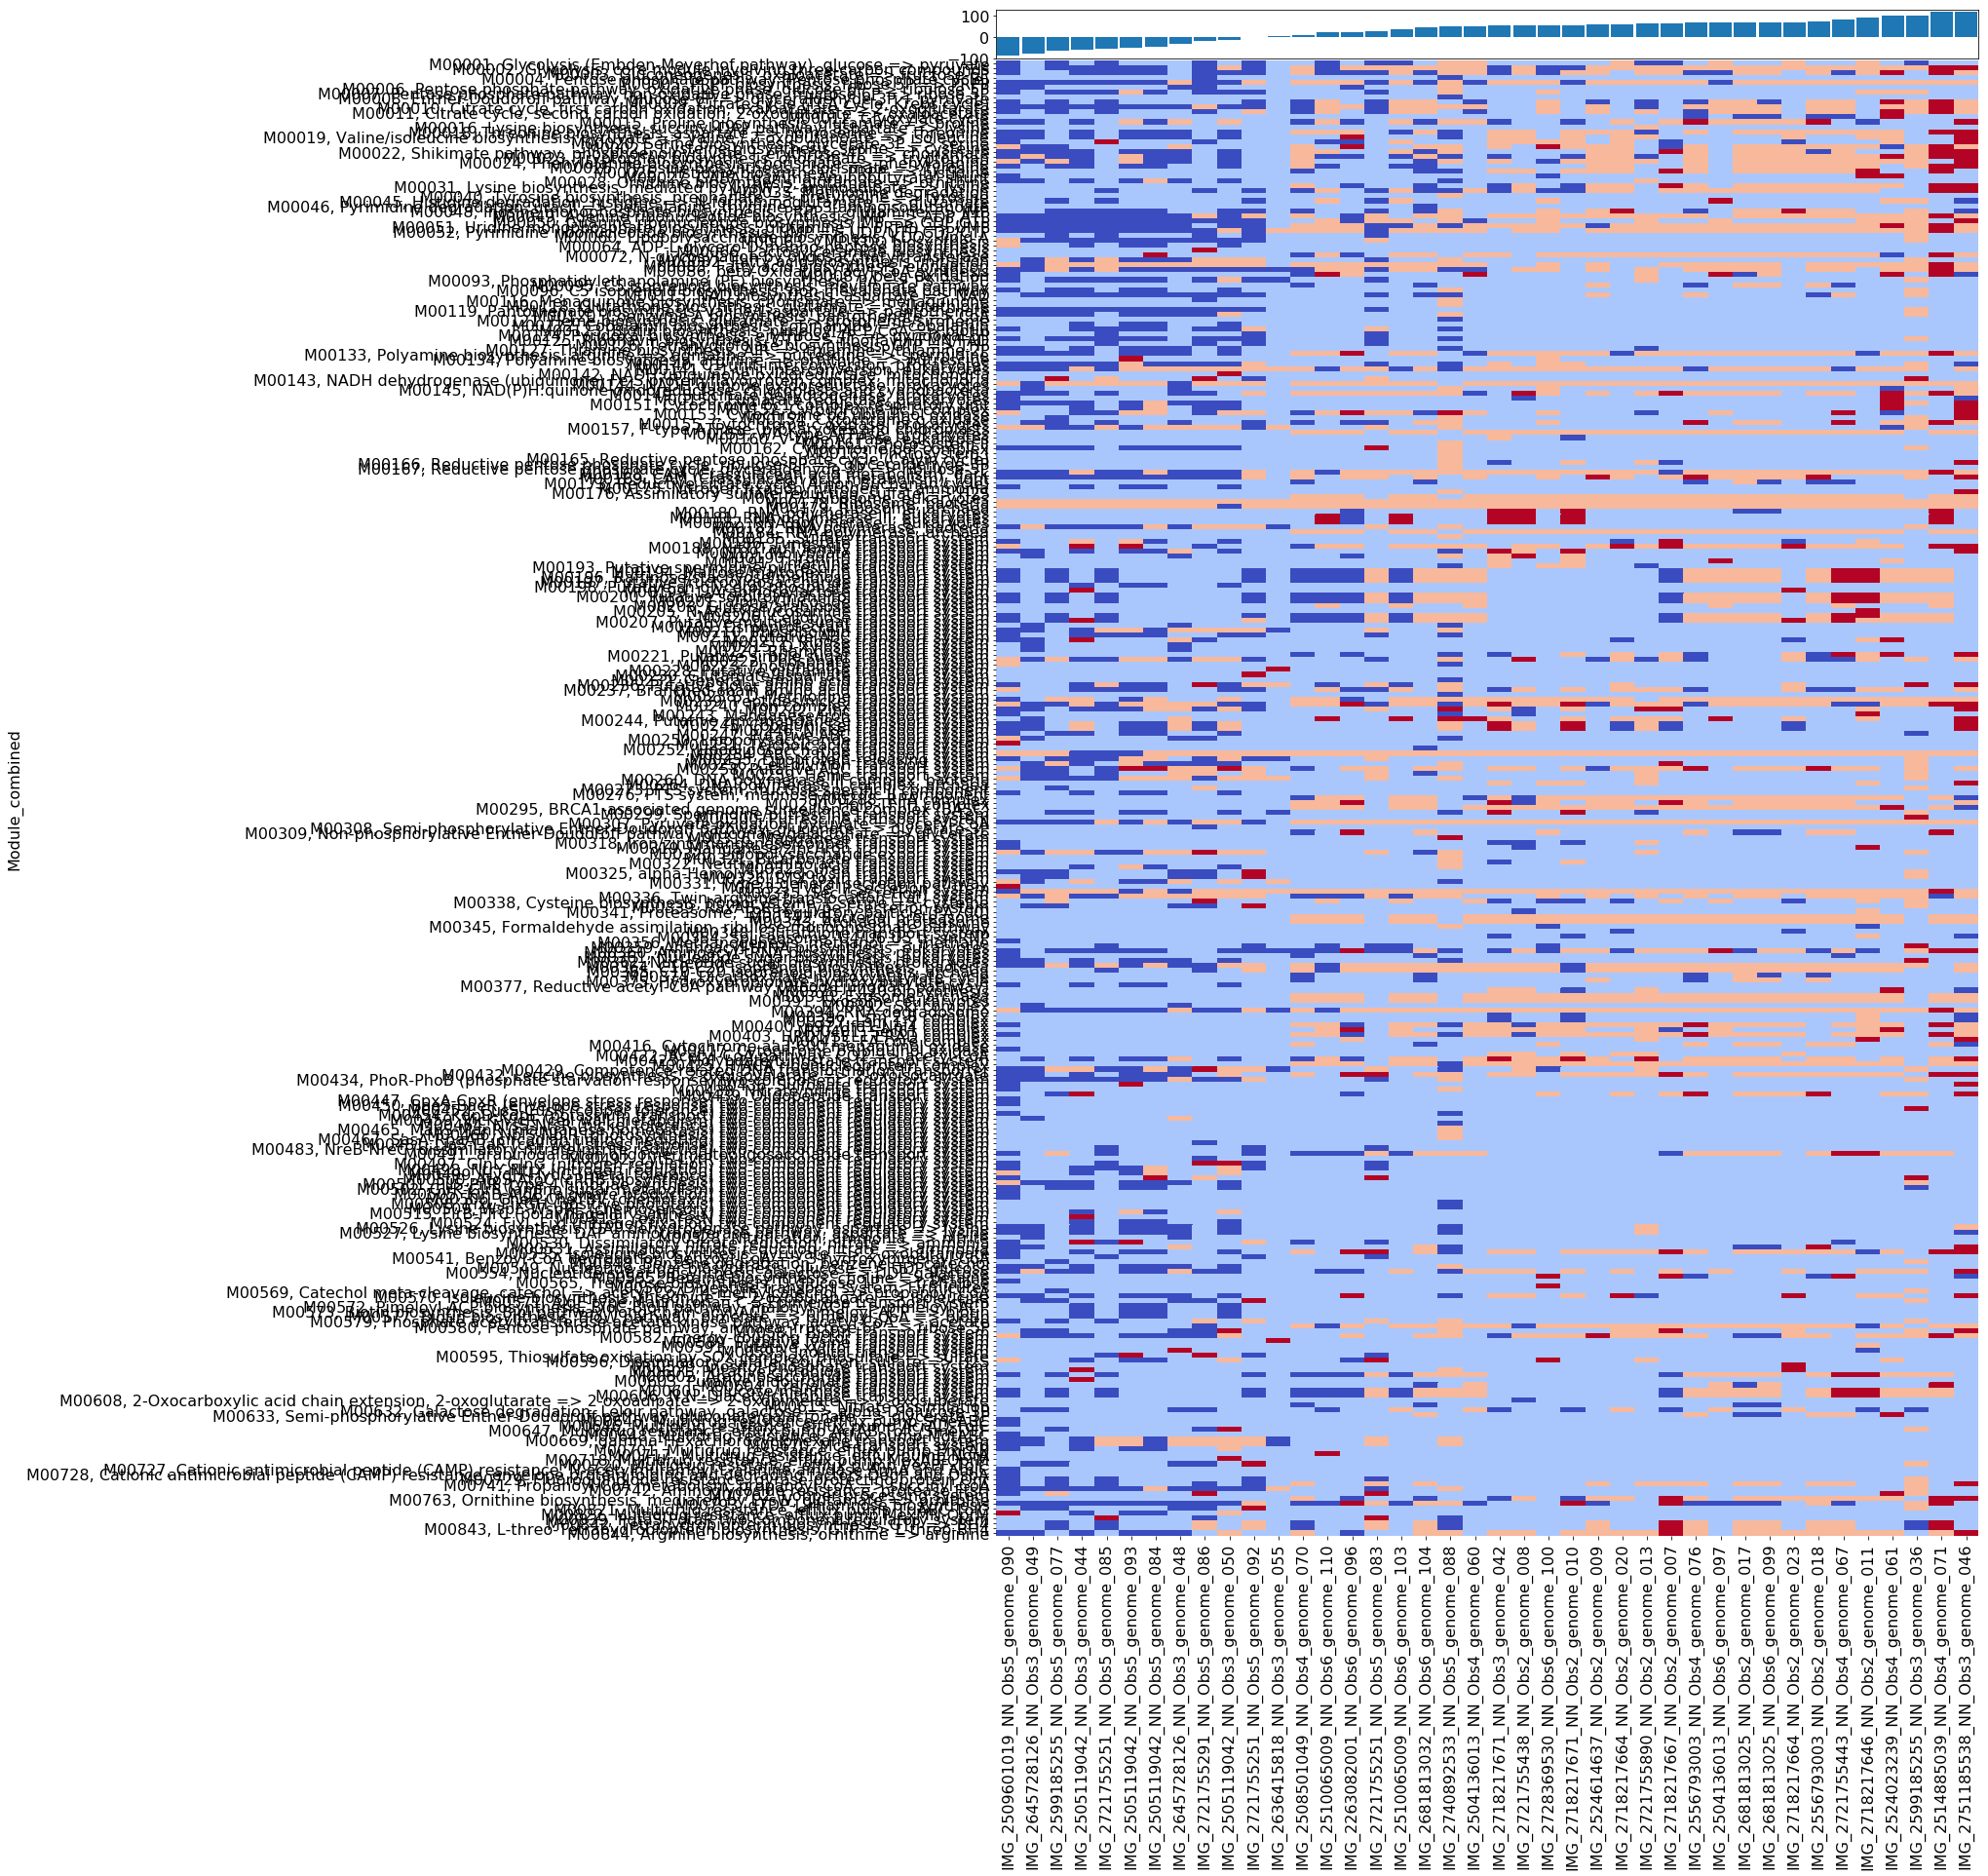

In [740]:
f = plt.figure()
f.set_figheight(25)
f.set_figwidth(35)
gs = gridspec.GridSpec(30,1)
ax1 = f.add_subplot(gs[1:,0])
sns.heatmap(map_cons[map_cons.fillna(0).sum().sort_values().index].fillna(0),cmap="coolwarm",ax=ax1,yticklabels=True,cbar=False)
plt.gcf().subplots_adjust(left=0.5,bottom=.11,top=0.98)
ax2 = f.add_subplot(gs[0,0])
map_cons.fillna(0).sum().sort_values().plot.bar(ax=ax2,width=.91)
plt.xticks([])
plt.xlabel('')
plt.xlim(-0.5,len(mapC.T)-0.5)

gs.update(wspace=.05,hspace=.05)
#plt.show()

f.savefig('/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/Knumbers/plots/overview_heatmap2')

In [909]:
#dataC = mapD.fillna(0)
"""D = pdist(dataC, 'euclidean')
Z = linkage(D, 'ward')
row_link = _optimal_order(dataC, metric='correlation')

optimal_Z = optimal_leaf_ordering(Z, D)

cgClust = sns.clustermap(dataC, row_linkage=row_link, col_linkage=row_link,figsize=(20,40))
plt.show()"""

"D = pdist(dataC, 'euclidean')\nZ = linkage(D, 'ward')\nrow_link = _optimal_order(dataC, metric='correlation')\n\noptimal_Z = optimal_leaf_ordering(Z, D)\n\ncgClust = sns.clustermap(dataC, row_linkage=row_link, col_linkage=row_link,figsize=(20,40))\nplt.show()"

In [395]:
f = plt.figure()
f.set_figheight(55)
f.set_figwidth(25)
gs = gridspec.GridSpec(30,1)
ax1 = f.add_subplot(gs[1:,0])
sns.heatmap(map_cons[map_cons.fillna(0).sum().sort_values().index].fillna(0),cmap="coolwarm",ax=ax1,yticklabels=True,cbar=False)
plt.gcf().subplots_adjust(left=0.5,bottom=.11,top=0.98)
ax2 = f.add_subplot(gs[0,0])
mapC.fillna(0).sum().sort_values().plot.bar(ax=ax2,width=.91)
plt.xticks([])
plt.xlabel('')
plt.xlim(-0.5,len(mapC.T)-0.5)

gs.update(wspace=.05,hspace=.05)
f.savefig('/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/Knumbers/plots/overview_heatmap_conservative')

# Start Running COG scripts here

# COG mapping

In [12]:
pd.read_table('MAGs/metabolic_reconstruction_gene_list2.tsv')
lookup_obsidian

,IMG_ID,Nearest neighbor ID,Domain,Phylum,Class,Order,Family,Genus,Species,Classification up to,...,GC,GC std,Genome size,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,final_list,old_name,CRISPR
Obsidian Bins,,,,,,,,,,,,,,,,,,,,,
Obs2_genome_000,2770939329,IMG637000010,Bacteria,Aquificae,Aquificae,Aquificales,Aquificaceae,unclassified,unclassified,Family,...,0.41,0.01,1595505,170142,43116.43,121218,0,Obsidian2_genome_000_1,M00,Yes
Obs2_genome_001,2770939330,IMG650716098,Archaea,Crenarchaeota,Thermoprotei,Thermoproteales,Thermoproteaceae,Thermoproteus,unclassified,Genus,...,0.61,0.04,1791190,169268,21072.82,38841,0,Obsidian2_genome_001,M01,No
Obs2_genome_002,2770939331,UBA4801,Bacteria,Acetothermia,unclassified,unclassified,unclassified,unclassified,unclassified,Phylum,...,0.58,0.03,419597,31784,8391.94,8830,0,Obsidian2_genome_003_1,M03,No
Obs2_genome_003,2770939332,ND,Archaea,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,Domain,...,0.48,0.02,385577,16585,7275.04,7158,0,Obsidian2_genome_004_2,M04,Yes
Obs2_genome_004,2770939333,ND,Bacteria,Proteobacteria,Deltaproteobacteria,unclassified,unclassified,unclassified,unclassified,Class,...,0.46,0.02,1520096,161659,60803.44,95131,0,Obsidian2_genome_005_1,M05,Yes
Obs2_genome_005,2770939334,ND,Archaea,Crenarchaeota,unclassified,unclassified,unclassified,unclassified,unclassified,Phylum,...,0.36,0.01,576925,30186,8875.77,8802,0,Obsidian2_genome_006_1,M06,No
Obs2_genome_006,2770939335,IMG2739367758,Archaea,Crenarchaeota,Thermoprotei,Thermoproteales,Thermofilaceae,Thermofilum,unclassified,Genus,...,0.58,0.03,1762164,146213,19799.60,30557,0,Obsidian2_genome_008_1,M08,Yes
Obs2_genome_007,2770939336,IMG2718217667,Archaea,Crenarchaeota,unclassified,unclassified,unclassified,unclassified,unclassified,Phylum,...,0.39,0.01,1607278,383878,42294.21,102680,0,Obsidian2_genome_009_1,M09,Yes
Obs2_genome_008,2770939337,IMG2721755438,Archaea,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,Domain,...,0.55,0.02,1665326,223828,20308.85,28180,0,Obsidian2_genome_010_1,M10,Yes


In [56]:
COGtab[COGtab.name.str.contains('Methyl coenzyme M')]
COGtab[COGtab.name.str.contains('acetyl-CoA')] #['COG1850','COG4451']
#def searchGenes(bin_name,keyword):
keyword = 'CoA'
bin_name = 'Obs4_genome_061'
img_id = lookup_obsidian[lookup_obsidian.index==bin_name]['IMG_ID'].values[0].astype(str)
folder = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'+bin_name+'_IMG_'+img_id+'/IMG_Data/'+img_id+'/'        
cofile = folder+img_id+'.cog.tab.txt'
kofile = folder+img_id+'.ko.tab.txt'
pffile = folder+img_id+'.pfam.tab.txt'

codf = pd.read_table(cofile,'\t') #'cog_name','cog_id','percent_identity'
kodf = pd.read_table(kofile,'\t') #'ko_name','ko_id','percent_identity'
kodf = kodf[~kodf['ko_name'].isnull()]
pfdf = pd.read_table(pffile,'\t') #'pfam_name','pfam_id'
    
codf_s = codf[codf['cog_name'].str.contains(keyword)]
kodf_s = kodf[kodf['ko_name'].str.contains(keyword)]
pfdf_s = pfdf[pfdf['pfam_name'].str.contains(keyword)]



In [57]:
codf_s


,gene_oid,gene_length,percent_identity,query_start,query_end,subj_start,subj_end,evalue,bit_score,cog_id,cog_name,cog_length
32,2771208645,263,43.46,2,260,3,257,1.000000e-57,216.0,COG1024,Enoyl-CoA hydratase/carnithine racemase,257
33,2771208646,257,46.30,2,254,3,257,3.000000e-67,248.0,COG1024,Enoyl-CoA hydratase/carnithine racemase,257
48,2771208672,190,26.24,2,181,3,200,2.000000e-16,79.6,COG0237,Dephospho-CoA kinase,201
58,2771208684,397,35.98,1,395,1,390,7.000000e-70,258.0,COG1960,Acyl-CoA dehydrogenase related to the alkylati...,393
104,2771208756,538,30.32,27,536,12,508,6.000000e-70,258.0,COG0318,Acyl-CoA synthetase (AMP-forming)/AMP-acid lig...,534
216,2771208972,390,37.18,5,385,1,390,5.000000e-78,285.0,COG1960,Acyl-CoA dehydrogenase related to the alkylati...,393
218,2771208974,378,26.20,7,378,4,391,8.000000e-43,168.0,COG0183,Acetyl-CoA acetyltransferase,392
219,2771208975,385,35.86,2,385,2,391,1.000000e-75,277.0,COG0183,Acetyl-CoA acetyltransferase,392
238,2771209004,438,39.78,1,438,14,468,6.000000e-114,404.0,COG1012,Acyl-CoA reductase or other NAD-dependent alde...,472
243,2771209014,332,40.65,1,155,3,157,2.000000e-37,149.0,COG1607,Acyl-CoA hydrolase,157


In [11]:
cmap = COGmapper(ctab)
cmap_30 = COGmapper(ctab_30)
cmap_40 = COGmapper(ctab_40)
cmap_50 = COGmapper(ctab_50)
cmap_60 = COGmapper(ctab_60)
cmap_70 = COGmapper(ctab_70)
cmap_tot = cmap.fillna(0)+cmap_30.fillna(0)+cmap_40.fillna(0)+cmap_50.fillna(0)+cmap_60.fillna(0)+cmap_70.fillna(0)

In [147]:
lookup_obsidian[lookup_obsidian.index.str.contains('054')]

,IMG_ID,Nearest neighbor ID,Domain,Phylum,Class,Order,Family,Genus,Species,Classification up to,...,GC std,Genome size,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,final_list,old_name,CRISPR,Clade
Obsidian Bins,,,,,,,,,,,,,,,,,,,,,
Obs3_genome_054,2770939383,ND,Archaea,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,Domain,...,0.02,337598,15711,7851.12,7976,0,Obs3_mini_26,Obs3_mini_26,No,Verstraetearchaeota


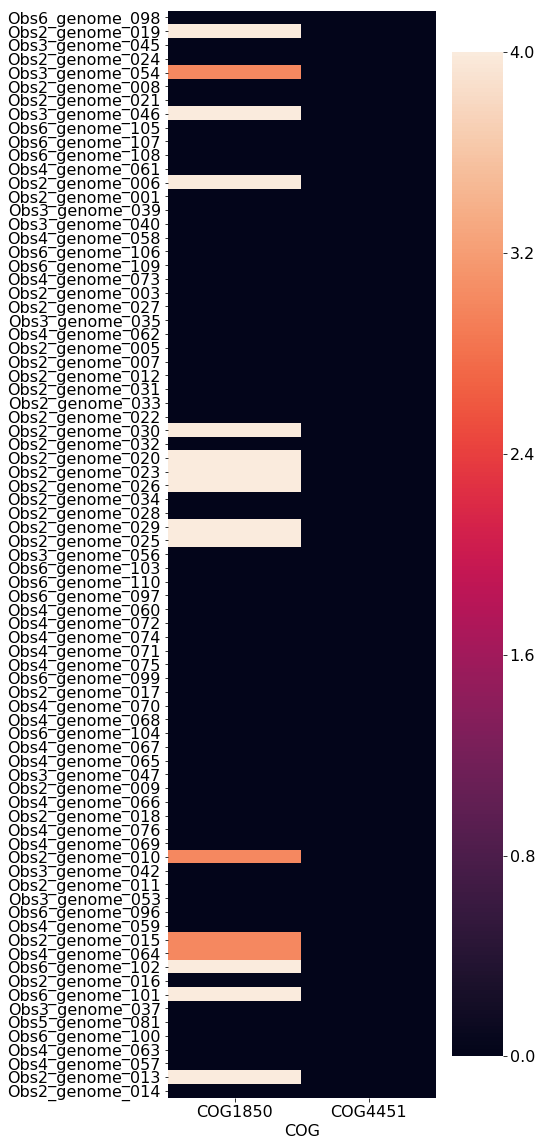

In [159]:
cogidx = list(COGtab[COGtab.name.str.contains('Methyl coenzyme M')]['COG'])
cogidx = ['COG1850','COG4451']
cogcols = list(cladeDF_tot.Bin_ID)
f = plt.figure()
f.set_figheight(20)

sns.heatmap(cmap_tot.loc[cogidx,cogcols].T.fillna(0),yticklabels=True)
plt.show()

In [10]:
COGcat = pd.read_table('COGreffiles/fun2003-2014.tab')
COGtab = pd.read_table('COGreffiles/cognames2003-2014.tab')
COGtab['NameNum'] = COGtab['name']+' -- '+COGtab['COG']
COGtab['FuncCat'] = [COGcat[COGcat['# Code']==i[0]]['Name'].values[0] for i in COGtab['func']]
COGtab.FuncCat.value_counts()

Function unknown                                                 959
General function prediction only                                 507
Translation, ribosomal structure and biogenesis                  326
Energy production and conversion                                 268
Amino acid transport and metabolism                              265
Carbohydrate transport and metabolism                            239
Inorganic ion transport and metabolism                           210
Cell wall/membrane/envelope biogenesis                           204
Coenzyme transport and metabolism                                204
Transcription                                                    186
Replication, recombination and repair                            176
Posttranslational modification, protein turnover, chaperones     172
Signal transduction mechanisms                                   144
Nucleotide transport and metabolism                              115
Mobilome: prophages, transposons  

In [1351]:
#this is COG comparison of all COG hits , as well as % identity 
s,p,m,mappy,mappy_func = COGVenn(ctab_NN[colin],ctab,'allCOG')
s30,p30,m30,mappy30,mappy_func30 = COGVenn(ctab_NN_30[colin],ctab_30,'30PI_COG')
s40,p40,m40,mappy40,mappy_func40 = COGVenn(ctab_NN_40[colin],ctab_40,'40PI_COG')
s50,p50,m50,mappy50,mappy_func50 = COGVenn(ctab_NN_50[colin],ctab_50,'50PI_COG')
s60,p60,m60,mappy60,mappy_func60 = COGVenn(ctab_NN_60[colin],ctab_60,'60PI_COG')
s70,p70,m70,mappy70,mappy_func70 = COGVenn(ctab_NN_70[colin],ctab_70,'70PI_COG')
s80,p80,m80,mappy80,mappy_func80 = COGVenn(ctab_NN_80[colin],ctab_80,'80PI_COG')

In [13]:
def plotCOGcats(df,name):
    plotdf = df.copy() #df has to be a COG map (index=COG number; columns=MAG)
    plotdf.index = COGtab[COGtab['COG'].isin(df.index)].set_index('COG')['NameNum'] # set index to human readable format      
    for cat in COGtab['FuncCat'].unique():
        if plotdf.index.isin(COGtab[COGtab['FuncCat']==cat]['NameNum']).any()==True:
            sel = plotdf.loc[COGtab[COGtab['FuncCat']==cat]['NameNum'],:].dropna(how='all').fillna(0)
            
            figheight = int(round(len(sel)/4))
            if figheight<5:
                figheight=5
                top=0.8
            elif figheight<=20:
                top=0.9
            elif figheight>20:
                top=0.98
            if cat=='Cell wall/membrane/envelope biogenesis':
                cat = 'Cell wall,membrane,envelope biogenesis'
                
            f = plt.figure()
            f.set_figheight(figheight)
            f.set_figwidth(20)
            gs = gridspec.GridSpec(1,1)
            
            ax1 = f.add_subplot(gs[0,0])
            sns.heatmap(sel,cmap='coolwarm',cbar=False,ax=ax1,yticklabels=True,xticklabels=True,vmin=-1,vmax=2)
            plt.gcf().subplots_adjust(left=0.65,right=0.98,top=top)#,bottom=.11,top=0.98)
            plt.title(name[0:2]+'% '+cat)
            f.savefig('/home/bojk/Data/MAGs/Analysis/COGplots/'+name+'/'+name+'_COG_cat_'+cat+'.png')
            f.clf()
            
#  function for optimal leaf ordering
def _optimal_order(data, **kwargs):
    """ Optimal leaf ordering
        **kwargs passed to pdist e.g. metric='correlation'
    """
    d = pdist(data, **kwargs)
    link = linkage(d, method='ward')
    optimal_order = optimal_leaf_ordering(link, d)
    return optimal_order

def polo(df,metric):
    # the distance metric. (‘braycurtis’, ‘canberra’, ‘chebyshev’
                            #  , ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’
                            #  , ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’
                            #  , ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’
                            #  , ‘russellrao’, ‘seuclidean’, ‘sokalmichener’
                            #  , ‘sokalsneath’, ‘sqeuclidean’, ‘yule’)  
    dataR = df.fillna(0)
    dataC = df.fillna(0).T

    D = pdist(dataR,metric)
    Z = linkage(D, 'ward')
    row_link = _optimal_order(dataR, metric=metric)
    col_link = _optimal_order(dataC, metric=metric)

    optimal_Z = optimal_leaf_ordering(Z, D)

    cgClust = sns.clustermap(dataR, row_linkage=row_link, col_linkage=col_link,figsize=(20,40),cmap='coolwarm')
    row_idx = cgClust.dendrogram_row.reordered_ind
    col_idx = cgClust.dendrogram_col.reordered_ind
    return(row_idx,col_idx)

def plotCOGcatsPOLO(df,name):
    plotdf = df.copy() #df has to be a COG map (index=COG number; columns=MAG)
    plotdf.index = COGtab[COGtab['COG'].isin(df.index)].set_index('COG')['NameNum'] # set index to human readable format      
    for cat in COGtab['FuncCat'].unique():
        if plotdf.index.isin(COGtab[COGtab['FuncCat']==cat]['NameNum']).any()==True:
            sel = plotdf.loc[COGtab[COGtab['FuncCat']==cat]['NameNum'],:].dropna(how='all').fillna(0)
                        
            if len(sel)>1:
                row_index,col_index = polo(sel,'hamming')
                
                figheight = int(round(len(sel)/4))
                if figheight<5:
                    figheight=5
                    top=0.8
                elif figheight<=20:
                    top=0.9
                elif figheight>20:
                    top=0.98
                if cat=='Cell wall/membrane/envelope biogenesis':
                    cat = 'Cell wall,membrane,envelope biogenesis'

                f = plt.figure()
                f.set_figheight(figheight)
                f.set_figwidth(20)
                gs = gridspec.GridSpec(30,1)
                ax1 = f.add_subplot(gs[1:,0])
                sns.heatmap(sel.iloc[row_index,col_index],cmap='coolwarm',cbar=False,ax=ax1,yticklabels=True,xticklabels=True,vmin=-1,vmax=2)      
                
                ax2 = f.add_subplot(gs[0,0])
                lut = {'Archaea':'m','Bacteria':'g'}
                color = colindf2['Domain'].map(lut)                
                plt.bar(list(range(0,len(colindf2))),colindf2.iloc[col_index,1],color=color[colindf2.iloc[col_index,:].index].values,width=0.9,alpha=.6)
                ax2.set_ylabel('genome\ncompleteness', rotation=0, labelpad=60)
                #ax2.patch.set_visible(False)
                plt.xlim(-0.5,len(colindf2)-0.5)
                ax2.axis('off')
                plt.xlabel('')
                plt.xticks([])
                plt.title(name[0:2]+'% '+cat)
                
                gs.update(wspace=.05,hspace=.2)
                plt.gcf().subplots_adjust(left=0.65,right=0.98,top=top)#,bottom=.11,top=0.98)
                f.savefig('/home/bojk/Data/MAGs/Analysis/COGplots/'+name+'/'+name+'_OLO_COG_cat_'+cat+'.png')
                f.clf()

In [1222]:
#plotCOGcats(mappy30,'30PI_hits')
plotCOGcatsPOLO(mappy30[colin],'30PI_hits')
#plotCOGcats(mappy40[colin],'40PI_hits')
plotCOGcatsPOLO(mappy40[colin],'40PI_hits')
#plotCOGcats(mappy50[colin],'50PI_hits')
plotCOGcatsPOLO(mappy50[colin],'50PI_hits')
#plotCOGcats(mappy60[colin],'60PI_hits')
plotCOGcatsPOLO(mappy60[colin],'60PI_hits')
#plotCOGcats(mappy70,'70PI_hits')
#plotCOGcatsPOLO(mappy70[colin],'70PI_hits')
#plotCOGcats(mappy80,'80PI_hits')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [1082]:
COGtab['FuncCat'].unique()[1]

'Amino acid transport and metabolism'

In [1059]:
# make df of bins that have a NN COG cat entry, and get the genome completeness.
# this is a very hacky way, but works for now. 
excl = ['_082','_063','_039','_001','_094','_078','_041','_000'] # no COG hits for these NN bins
collist = plu.T
col = [collist[collist.index.str.contains(i)].index[0] for i in excl]
colin = plu.T[~plu.columns.isin(col)].T.columns
colin_genome = [name[-15:] for name in colin]
colindf = pd.DataFrame(index=range(0,len(colin)),columns=['NNgenome','genome','Completeness'])
colindf['NNgenome'] = [i for i in colin]
colindf['genome'] = [i for i in colin_genome]

colindf2 = colindf.set_index('genome',drop=False)
colindf2['Completeness'] = lookup_obsidian[lookup_obsidian['Obsidian Bins '].isin(colindf.genome)].set_index('Obsidian Bins ')['Completeness']      
colindf2['Domain'] = lookup_obsidian[lookup_obsidian['Obsidian Bins '].isin(colindf.genome)].set_index('Obsidian Bins ')['Domain']    
colindf2 = colindf2.set_index('NNgenome')
colindf2

,genome,Completeness,Domain
NNgenome,,,
IMG_2721755251_NN_Obs5_genome_085,Obs5_genome_085,26.04,Bacteria
IMG_2751185538_NN_Obs3_genome_046,Obs3_genome_046,94.49,Archaea
IMG_2510065009_NN_Obs6_genome_110,Obs6_genome_110,81.22,Archaea
IMG_2721755251_NN_Obs5_genome_092,Obs5_genome_092,42.94,Bacteria
IMG_2636415818_NN_Obs3_genome_055,Obs3_genome_055,17.40,Bacteria
IMG_2599185255_NN_Obs3_genome_036,Obs3_genome_036,96.07,Bacteria
IMG_2645728126_NN_Obs3_genome_048,Obs3_genome_048,22.41,Bacteria
IMG_2681813025_NN_Obs6_genome_099,Obs6_genome_099,95.83,Archaea
IMG_2505119042_NN_Obs3_genome_044,Obs3_genome_044,16.67,Bacteria


In [1062]:
colindf2['Domain'].unique()

array(['Bacteria', 'Archaea'], dtype=object)

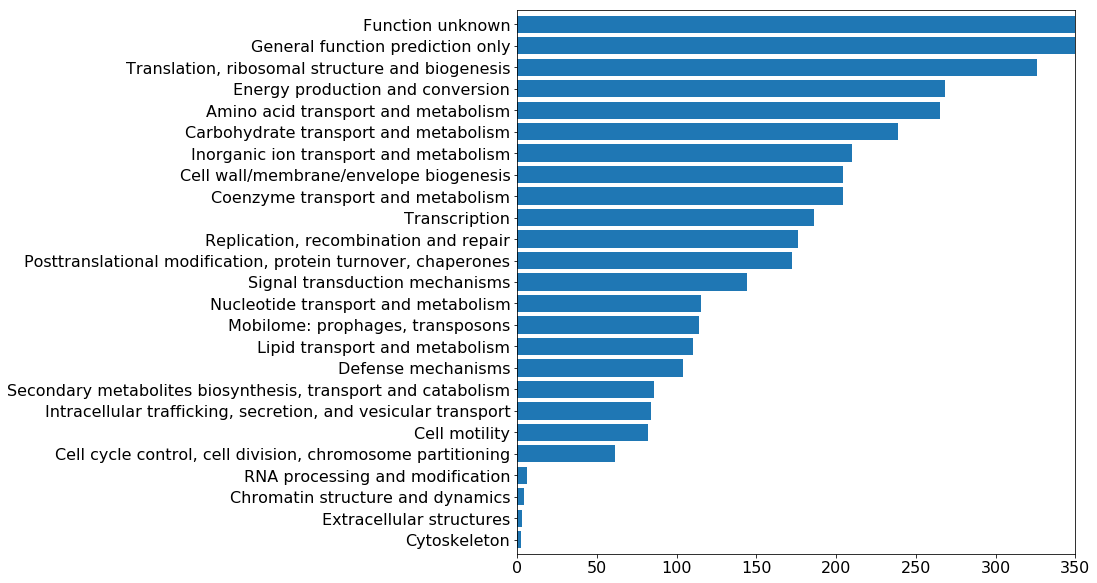

In [893]:
#this is COG comparison of all COG hits (+30% identity will be done later.)
#s,p,m,mappy,mappy_func = COGVenn(ctab_NN,ctab,'allCOG')
COGtab['FuncCat'].value_counts().plot.barh(width=0.8,figsize=(10,10))
plt.gca().invert_yaxis()
plt.xlim(0,350)
plt.show()

In [574]:
f = plt.figure()
f.set_figheight(55)
f.set_figwidth(25)
gs = gridspec.GridSpec(30,1)
ax1 = f.add_subplot(gs[1:,0])
sns.heatmap(mappy[mappy.fillna(0).sum().sort_values().index].fillna(0),cmap="coolwarm",ax=ax1,yticklabels=True,cbar=False)
plt.gcf().subplots_adjust(left=0.5,bottom=.11,top=0.98)
ax2 = f.add_subplot(gs[0,0])
mappy.fillna(0).sum().sort_values().plot.bar(ax=ax2,width=.91)
plt.xticks([])
plt.xlabel('')
plt.xlim(-0.5,len(mappy.T)-0.5)

gs.update(wspace=.05,hspace=.05)
f.savefig('/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/Knumbers/COG/plots/overview_heatmap_COG.png')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [629]:

plu = p.copy()
plu.index = COGtab[COGtab['COG'].isin(plu.index)]['FuncCat']
plus_VCdf = plu.fillna(0).groupby(plu.index).sum()
plus_VCdf2 = plu.groupby(plu.index).sum();plus_VCdf2 = plus_VCdf2.drop(col,axis=1)
plus_VCdf3 = plus_VCdf2.divide(plu.index.value_counts(),axis='index')

f = plt.figure()
f.set_figheight(20)
f.set_figwidth(25)
gs = gridspec.GridSpec(30,1)
ax1 = f.add_subplot(gs[1:,0])
sns.heatmap(plus_VCdf3[plus_VCdf3.sum().sort_values().index],cmap="coolwarm",ax=ax1,yticklabels=True,cbar=False)
plt.gcf().subplots_adjust(left=0.5,bottom=.11,top=0.98)
ax2 = f.add_subplot(gs[0,0])
plus_VCdf3.sum().sort_values().plot.bar(ax=ax2,width=.91)
plt.xticks([])
plt.xlabel('')
plt.suptitle('MAG function addition per COG category')
plt.xlim(-0.5,len(plus_VCdf3.T)-0.5)

gs.update(wspace=.05,hspace=.05)
f.savefig('/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/Knumbers/COG/plots/overview_bubbleCOG_fin_norm.png')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [630]:
#m.index = COGtab[COGtab['COG'].isin(m.index)]['FuncCat']
min_VCdf = m.fillna(0).groupby(m.index).sum()
min_VCdf2 = m.groupby(m.index).sum();min_VCdf2 = min_VCdf2.drop(col,axis=1)
min_VCdf3 = min_VCdf2.divide(plu.index.value_counts(),axis='index')
f = plt.figure()
f.set_figheight(20)
f.set_figwidth(25)
gs = gridspec.GridSpec(30,1)
ax1 = f.add_subplot(gs[1:,0])
sns.heatmap(min_VCdf3[min_VCdf3.sum().sort_values().index],cmap="coolwarm",ax=ax1,yticklabels=True,cbar=False)
plt.gcf().subplots_adjust(left=0.5,bottom=.11,top=0.98)
ax2 = f.add_subplot(gs[0,0])
min_VCdf3.sum().sort_values().plot.bar(ax=ax2,width=.91)
plt.xticks([])
plt.xlabel('')
plt.suptitle('MAG function loss per COG category')
plt.xlim(-0.5,len(min_VCdf2.T)-0.5)

gs.update(wspace=.05,hspace=.05)
f.savefig('/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/Knumbers/COG/plots/overview_bubbleCOG_loss_norm.png')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [633]:
comlist = ['Obs2_genome_007','Obs2_genome_011','Obs2_genome_017','Obs2_genome_018',
           'Obs4_genome_060','Obs4_genome_070','Obs4_genome_071','Obs4_genome_076',
           'Obs5_genome_083','Obs5_genome_085','Obs5_genome_090','Obs5_genome_092',
           'Obs6_genome_096','Obs6_genome_097','Obs6_genome_099','Obs6_genome_103',
           'Obs6_genome_104','Obs6_genome_110']

# COG clade analysis 

In [30]:
# go from COGlist to COGmap first.
def COGmapper(COGlist,COGreftable):
    COGmap = pd.DataFrame(index=COGreftable['NameNum'],columns=COGlist.columns)
    for col in COGmap.columns:
        idxshort = COGlist[col].dropna()
        idx = COGreftable[COGreftable['COG'].isin(idxshort)]['NameNum']
        COGmap.loc[idx,col] = 1
    return(COGmap)

def COGcladePOLO(df,savename):
    for clade in cladeDF_true.Group.unique():    
        dfclade = df[cladeDF_true[cladeDF_true['Group']==clade]['Bin_ID']]
        for cat in COGtab.FuncCat.unique():
            if cat=='Cell wall/membrane/envelope biogenesis':
                catname = 'Cell wall,membrane,envelope biogenesis'
            else:
                 catname = cat

            dfcat = dfclade[dfclade.index.isin(COGtab[COGtab['FuncCat']==cat]['NameNum'])]
            dfp = dfcat.dropna(how='all').dropna(how='all',axis=1).fillna(0)

            if (len(dfp)>1) and (len(dfp.T)>1):
                row_idx,col_idx = polo(dfp,'braycurtis')
                f = plt.figure()
                f.set_figheight(20)
                f.set_figwidth(25)
                gs = gridspec.GridSpec(30,1)

                ax1 = f.add_subplot(gs[1:,0])
                sns.heatmap(dfp.iloc[row_idx,col_idx],cmap="coolwarm",ax=ax1,yticklabels=True,xticklabels=True,cbar=False)
                plt.gcf().subplots_adjust(left=0.5,bottom=.11,top=0.95)
                plt.title(savename+' '+catname)
                f.savefig('MAGs/Analysis/COGplots/Clades/COG_clades_'+clade+'_'+catname+'_'+savename+'.png')


In [31]:
cmap_clade_50 = COGmapper(ctab_clade_50,COGtab)
cmap_clade_40 = COGmapper(ctab_clade_40,COGtab)


In [17]:
COGcladePOLO(cmap_clade_50,'50PID')

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [27]:
def plotCladeVenns(cladeCMapDF,percentID,main_path):
    
    for group in cladeDF_true.Group.unique():
        # select the genomes in group
        cladeDF_temp = cladeDF_true[cladeDF_true['Group']==group]
        id_Obs = cladeDF_temp[cladeDF_temp['Bin_ID'].str.contains('Obs')]['Bin_ID']
        id_Cla = cladeDF_temp[~cladeDF_temp['Bin_ID'].str.contains('Obs')]['Bin_ID']
        
        Obsdf = cladeCMapDF[id_Obs]
        Cladf = cladeCMapDF[id_Cla]
        
        for cat in COGtab.FuncCat.unique():
            if cat=='Cell wall/membrane/envelope biogenesis':
                catname = 'Cell wall,membrane,envelope biogenesis'
            else:
                 catname = cat
            
            
            Obsdfcat = Obsdf[Obsdf.index.isin(COGtab[COGtab['FuncCat']==cat]['NameNum'])]
            Cladfcat = Cladf[Cladf.index.isin(COGtab[COGtab['FuncCat']==cat]['NameNum'])]
            
            
            vennObs = Obsdfcat.T.sum().dropna().index
            vennCla = Cladfcat.T.sum().dropna().index

            f = plt.figure()
            f.set_figheight(10);f.set_figwidth(10)
            venn2([set(list(vennCla)),set(list(vennObs))])
            plt.title(percentID+' COG in '+group+'\n'+catname)
            f.savefig(main_path+'COG_venn_'+group+'_'+catname+'_'+percentID)
            f.clf()



In [28]:
path = 'MAGs/Analysis/COGplots/Clades/Venn/'
PID = '50PID'
plotCladeVenns(cmap_clade_50,PID,path)

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib_venn/_venn2.py:50: UserWarning: Both circles have zero area
  warnings.warn("Both circles have zero area")


In [32]:
PID = '40PID'
plotCladeVenns(cmap_clade_40,PID,path)

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib_venn/_venn2.py:50: UserWarning: Both circles have zero area
  warnings.warn("Both circles have zero area")
